In [99]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
 
pd.set_option('display.max_columns',100) #to display all columns below
pd.set_option('display.max_rows',130)

In [100]:
df=pd.read_csv("./data/application_data.csv")
df.shape

(307511, 122)

### **As there are 122 columns it's difficult to do any meaningful analysis on all of them. Let's identify the best 20-25 columns for further analysis**

**While exploring the data set, we shall follow the below order to arrive at the final set of columns for further analysis**
 1. Remove the columns with more than 40% missing values, unless there are exceptions
 2. Handle missing values in the rest of the variables
 3. Check if all the variables left have the correct datatypes
 4. Check for any outlier values and handle them accordingly

# **CLEANING AND ANALYSIS OF DATA**

In [101]:
# Let's get a list of variables with more than 40% missing values
highnull_list = df.isnull().sum()/307511
print(highnull_list[highnull_list>0.4].sort_values().count())
highnull_list[highnull_list>0.4].sort_values().index.values

49


array(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'FLOORSMAX_AVG', 'HOUSETYPE_MODE', 'LIVINGAREA_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'ENTRANCES_MEDI',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MEDI',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'WALLSMATERIAL_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'EXT_SOURCE_1', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_MEDI', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'OWN_CAR_AGE', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_AVG'

- Out of the 49 variables that have high missing values there are 47 variables that deal with details related to the premises in which the client resides. Let's drop those variables for now. 
 
- There are two more variables- 'OWN_CAR_AGE' & 'EXT_SOURCE_1'. As 'EXT_SOURCE_1' deals with rating an external agency has given to our borrower, let's keep the variable and handle the missing values as deemed fit and drop the variable 'OWN_CAR_AGE'.

In [102]:
# Dropping columns with a high % of missing values

df.drop(columns = ['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'FLOORSMAX_AVG', 'HOUSETYPE_MODE', 'LIVINGAREA_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'ENTRANCES_MEDI',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MEDI',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'WALLSMATERIAL_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_MEDI', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'OWN_CAR_AGE', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG'], inplace=True)
df.shape

(307511, 74)

### **Rearranging the columns according to the following groups for easy access**
-   Customer info and rating (ID, Target, Ext_source...)
-   Socio-demographics of the customer (Gender, Employment, Education, Family, rating of the region/city)
-   Social circle of the customer 
-   Bank related info (Documents etc.,)

In [103]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SO

In [104]:
df = df[['SK_ID_CURR','TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_CONTRACT_TYPE',
         'CODE_GENDER','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE',
         'NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','CNT_CHILDREN',
         'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
         'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE','FLAG_OWN_CAR', 
         'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
         'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
         'NAME_TYPE_SUITE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
         'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
         'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 
         'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
         'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
         'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [105]:
# ChecKing for % of null values in the rest of the variables - in ascending order
100*df.isnull().sum().sort_values()/df.shape[0]

SK_ID_CURR                      0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_MOBIL                      0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15

#### We see that the following variables still have missing values
-  Categorical - OCCUPATION_TYPE & NAME_TYPE_SUITE
-  Numerical - EXT_SOURCE (1,2 &3), AMT_REQ_CREDIT_BUREAU( Hour, Day, Week, Month, Quarter and Year),  SOCIAL_CIRCLE (observed & defaulted), AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE 

## Handling categorical variables
- **OCCUPATION_TYPE** - IN this case we see there are around 30% missing values so lets analyse why are they missing and can we replace it with the mode value ie., 'Laborers'.

In [106]:
# Lets check the null columns and try to find some relation as to why those columns are missing the data.
df[df['OCCUPATION_TYPE'].isnull()].sample(10)

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
240309,378302,0,NaN,0.515425,NaN,Cash loans,M,Secondary / secondary special,-21105,-5535,Hotel,NaN,Working,Married,2.0,0,225000.0,1006920.0,51543.0,900000.0,Y,House / apartment,Y,0.035792,2,2,0.0,0.0,0.0,0.0,THURSDAY,17,Unaccompanied,-9137.0,-4377,1,1,0,1,0,0,0,0,0,0,0,0,-678.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
248212,387179,0,NaN,0.312290,0.574447,Cash loans,F,Secondary / secondary special,-21587,365243,XNA,NaN,Pensioner,Married,2.0,0,112500.0,808650.0,23773.5,675000.0,Y,House / apartment,N,0.010966,2,2,1.0,1.0,1.0,1.0,MONDAY,15,Unaccompanied,-3609.0,-4897,1,0,0,1,0,0,0,0,0,0,0,0,-2244.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
271743,415027,0,NaN,0.519623,0.681706,Cash loans,F,Higher education,-24267,-8325,Kindergarten,NaN,State servant,Widow,1.0,0,112500.0,203760.0,11826.0,180000.0,N,Municipal apartment,N,0.031329,2,2,4.0,1.0,4.0,1.0,FRIDAY,7,Family,-13413.0,-3852,1,1,0,1,1,0,0,0,0,0,0,0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
266392,408610,0,NaN,0.604717,0.574447,Cash loans,F,Secondary / secondary special,-20282,365243,XNA,NaN,Pensioner,Single / not married,1.0,0,135000.0,900000.0,26446.5,900000.0,Y,House / apartment,Y,0.026392,2,2,2.0,2.0,2.0,2.0,FRIDAY,15,Unaccompanied,-1381.0,-3357,1,0,0,1,0,0,0,0,0,0,0,0,-447.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
100189,216308,0,0.385798,0.229861,0.644679,Cash loans,F,Secondary / secondary special,-9391,365243,XNA,NaN,Pensioner,Married,3.0,1,225000.0,1192500.0,34996.5,1192500.0,N,House / apartment,Y,0.016612,2,2,0.0,0.0,0.0,0.0,THURSDAY,9,Unaccompanied,-4255.0,-2078,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
181951,310900,0,0.218526,0.377783,0.237916,Revolving loans,M,Higher education,-10432,-1758,Business Entity Type 2,NaN,Working,Separated,1.0,0,225000.0,135000.0,6750.0,135000.0,Y,With parents,N,0.030755,2,2,1.0,0.0,1.0,0.0,MONDAY,17,Unaccompanied,-5043.0,-3110,1,1,1,1,1,0,0,1,1,0,1,1,-134.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
239176,377016,0,NaN,0.424549,NaN,Revolving loans,F,Higher education,-20963,365243,XNA,NaN,Pensioner,Widow,1.0,0,175500.0,180000.0,9000.0,180000.0,Y,House / apartment,N,0.003818,2,2,2.0,1.0,2.0,1.0,FRIDAY,3,Unaccompanied,-79.0,-3830,1,0,0,1,0,0,0,0,0,0,0,0,-157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
290136,436124,0,NaN,0.464859,0.544235,Cash loans,F,Higher education,-23971,365243,XNA,NaN,Pensioner,Separated,1.0,0,135000.0,225000.0,15034.5,225000.0,Y,House / apartment,N,0.007330,2,2,0.0,0.0,0.0,0.0,THURSDAY,14,Unaccompa

In [107]:
# We can clearly see that there seems to be some relation with Income_Type and Organization_Type
# First, let's check how many values of Pensioner are present in the dataframe

df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [108]:
# Now, let's check for how many values of "Pensioner" in Income_Type we get a null value in Occupation_Type

df[df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts() 

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

-  Therefore we have a MNAR (Missing Not at Random) in Occupation_Type.
-  It's possible that the values are missing for those who are retired or working in fields that cannot be easily described.


#### **SOLUTION** - 
We can't replace the null values directly with 'Laborers' (mode) as it will wrongly inflate the numbers of laborers.
Instead, it's better to replace null values for "Pensioners" it with a new category called **'Retired'** and replace rest of the null values with **'Others'**

In [109]:
## Creating a new 'Retired' value for pensioners in income_type
df.loc[df['NAME_INCOME_TYPE']=='Pensioner','OCCUPATION_TYPE']='Retired'
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Others')
df['OCCUPATION_TYPE'].isnull().sum()

0

- **NAME_TYPE_SUITE** - There are 4% missing values. So, it's better to impute the missing values with the mode

In [110]:
df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [111]:
# As the most frequent value in the variable is "Unaccompanied", let's replace the null values with that
df['NAME_TYPE_SUITE'] = df.NAME_TYPE_SUITE.fillna("Unaccompanied")
df['NAME_TYPE_SUITE'].isnull().sum()

0

## Handling numerical variables
- **EXT_SOURCE_1** - In this case we see there are around 56% missing values
- **EXT_SOURCE_2** - In this case we see there are around 0.2% missing values
- **EXT_SOURCE_3** - In this case we see there are around 20% missing values
    - so lets analyse why are they missing and what can be done about them.

In [112]:
df.loc[:,["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


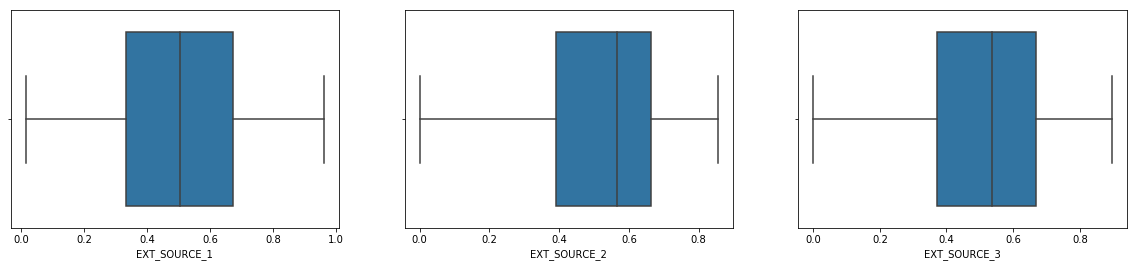

In [113]:
plt.figure(figsize = (20, 4))
plt.subplot(1,3,1)
sns.boxplot(df['EXT_SOURCE_1'])
plt.subplot(1,3,2)
sns.boxplot(df['EXT_SOURCE_2'])
plt.subplot(1,3,3)
sns.boxplot(df['EXT_SOURCE_3'])
plt.show()

In [114]:
df[df.EXT_SOURCE_1.isnull()].sample()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
211334,344902,0,NaN,0.714128,0.445396,Cash loans,F,Secondary / secondary special,-13639,-1071,Other,Laborers,Commercial associate,Married,2.0,0,108000.0,545040.0,25407.0,450000.0,Y,House / apartment,N,0.04622,1,1,2.0,0.0,2.0,0.0,THURSDAY,11,Unaccompanied,-7727.0,-302,1,1,0,1,0,0,0,0,0,0,1,1,-169.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [115]:
df[df.EXT_SOURCE_2.isnull()].sample()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
40685,147117,0,NaN,NaN,NaN,Cash loans,F,Incomplete higher,-8208,-467,Business Entity Type 3,Others,Working,Single / not married,1.0,0,315000.0,526491.0,32337.0,454500.0,Y,House / apartment,Y,0.04622,1,1,0.0,0.0,0.0,0.0,SUNDAY,15,Unaccompanied,-7556.0,-867,1,1,0,1,0,0,0,1,1,0,0,0,-947.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [116]:
df[df.EXT_SOURCE_3.isnull()].sample()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
114789,233105,0,0.188174,0.249482,NaN,Cash loans,F,Secondary / secondary special,-10627,-143,Business Entity Type 3,Sales staff,Working,Married,3.0,1,121500.0,439740.0,21285.0,315000.0,N,Rented apartment,N,0.019101,2,2,2.0,1.0,2.0,1.0,THURSDAY,9,Unaccompanied,-1967.0,-2116,1,1,0,1,0,1,0,0,0,0,0,0,-258.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### **OBSERVATION** - 
- It seems that the values are missing completely at random (MCAR)

#### **SOLUTION** - 
It is better to drop the rows that have mising values in all three variables and only keep those rows that have the data. 

In [117]:
df_n = df.copy()

In [118]:
df_n = df_n[~df_n.EXT_SOURCE_1.isnull()]

In [119]:
df_n = df_n[~df_n.EXT_SOURCE_2.isnull()]

In [120]:
df_n = df_n[~df_n.EXT_SOURCE_3.isnull()]

In [121]:
## Thus we get a new dataframe that has 35% of the rows ofthe original dataframe to work with these values
df_n.shape

(109589, 74)

- **AMT_REQ_CREDIT_BUREAU** - 13.5% of the customers don't have the detials pertaining to these variables. 
    - so let's analyse why are they missing and what can be done about them.

In [122]:
df.loc[:,["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


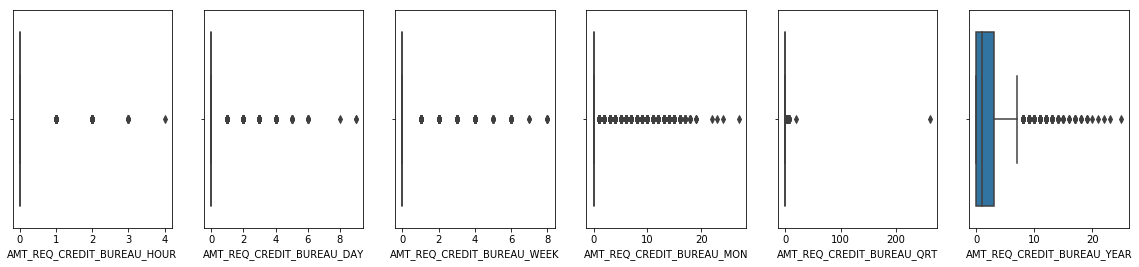

In [123]:
plt.figure(figsize = (20, 4))
plt.subplot(1,6,1)
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.subplot(1,6,2)
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.subplot(1,6,3)
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.subplot(1,6,4)
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_MON'])
plt.subplot(1,6,5)
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.subplot(1,6,6)
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

#### **SOLUTION** - 
Since outliers are present we will take median as the metric and hence substitute 0.00 for missing values.

In [124]:
df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]=df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(0.00)


- **SOCIAL_CIRCLE_ (observed & defaulted)** - 0.33% of the customers don't have the detials pertaining to these variables. 
    - so lets analyse why are they missing and what can be done about them.


In [125]:
df.loc[:,["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


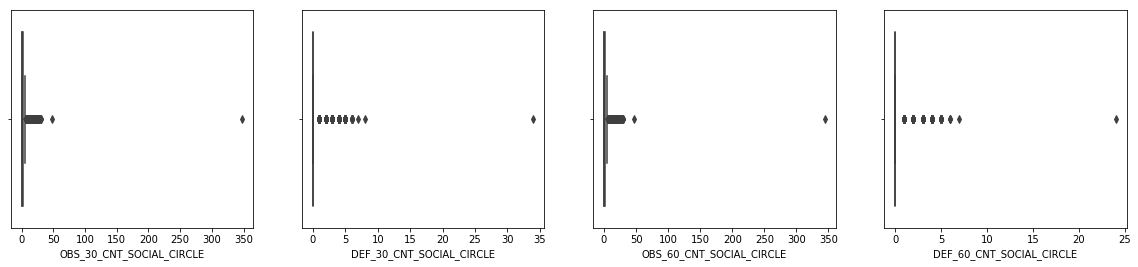

In [126]:
plt.figure(figsize=[20,4])
plt.subplot(1,4,1)
sns.boxplot(df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.subplot(1,4,2)
sns.boxplot(df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.subplot(1,4,3)
sns.boxplot(df['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.subplot(1,4,4)
sns.boxplot(df['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()


#### **OBSERVATION** - 
The values seem to be missing at random, and since there are only 0.33% of the dataset with missing values we can either drop them or impute the median value.
#### **SOLUTION** - 
Since outliers are present we will take median as the metric and hence substitute 0.00 for missing values.

In [127]:
df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]=df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].fillna(0.00)


- **AMT_GOODS_PRICE** - o.09% of the customers don't have the detials pertaining to these variables. 
- **AMT_ANNUITY**     - 0.003% of the customers don't have the detials pertaining to these variables.
- **CNT_FAM_MEMBERS** - 0.00065% of the customers don't have the detials pertaining to these variables.
    - As the % of missing values are negligible let's drop the rows


In [128]:
df=df[~df.CNT_FAM_MEMBERS.isnull()==True]
df=df[~df.AMT_GOODS_PRICE.isnull()==True]
df=df[~df.AMT_ANNUITY.isnull()==True]
df.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0.083037,0.262949,0.139376,Cash loans,M,Secondary / secondary special,-9461,-637,Business Entity Type 3,Laborers,Working,Single / not married,1.0,0,202500.0,406597.5,24700.5,351000.0,Y,House / apartment,N,0.018801,2,2,2.0,2.0,2.0,2.0,WEDNESDAY,10,Unaccompanied,-3648.0,-2120,1,1,0,1,1,0,0,0,0,0,0,0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0.311267,0.622246,NaN,Cash loans,F,Higher education,-16765,-1188,School,Core staff,State servant,Married,2.0,0,270000.0,1293502.5,35698.5,1129500.0,N,House / apartment,N,0.003541,1,1,1.0,0.0,1.0,0.0,MONDAY,11,Family,-1186.0,-291,1,1,0,1,1,0,0,0,0,0,0,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,NaN,0.555912,0.729567,Revolving loans,M,Secondary / secondary special,-19046,-225,Government,Laborers,Working,Single / not married,1.0,0,67500.0,135000.0,6750.0,135000.0,Y,House / apartment,Y,0.010032,2,2,0.0,0.0,0.0,0.0,MONDAY,9,Unaccompanied,-4260.0,-2531,1,1,1,1,1,0,0,0,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,NaN,0.650442,NaN,Cash loans,F,Secondary / secondary special,-19005,-3039,Business Entity Type 3,Laborers,Working,Civil marriage,2.0,0,135000.0,312682.5,29686.5,297000.0,Y,House / apartment,N,0.008019,2,2,2.0,0.0,2.0,0.0,WEDNESDAY,17,Unaccompanied,-9833.0,-2437,1,1,0,1,0,0,0,0,0,0,0,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,NaN,0.322738,NaN,Cash loans,M,Secondary / secondary special,-19932,-3038,Religion,Core staff,Working,Single / not married,1.0,0,121500.0,513000.0,21865.5,513000.0,Y,House / apartment,N,0.028663,2,2,0.0,0.0,0.0,0.0,THURSDAY,11,Unaccompanied,-4311.0,-3458,1,1,0,1,0,0,0,0,0,0,1,1,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
df.isnull().sum().sort_values().tail(4)

DAYS_LAST_PHONE_CHANGE         1
EXT_SOURCE_2                 659
EXT_SOURCE_3               60896
EXT_SOURCE_1              173230
dtype: int64

## Handling variables with incorrect data types
####  Let's apply a logic that if a column has unique values around 40, then that variable can be considered to be a categorical variable else it can be considered as a continuous variable

In [130]:
df.nunique().sort_values()

FLAG_EMP_PHONE                      2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_MOBIL                          2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_15                    2
FLAG_OWN_CAR

In [131]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 74 columns):
SK_ID_CURR                     307221 non-null int64
TARGET                         307221 non-null int64
EXT_SOURCE_1                   133991 non-null float64
EXT_SOURCE_2                   306562 non-null float64
EXT_SOURCE_3                   246325 non-null float64
NAME_CONTRACT_TYPE             307221 non-null object
CODE_GENDER                    307221 non-null object
NAME_EDUCATION_TYPE            307221 non-null object
DAYS_BIRTH                     307221 non-null int64
DAYS_EMPLOYED                  307221 non-null int64
ORGANIZATION_TYPE              307221 non-null object
OCCUPATION_TYPE                307221 non-null object
NAME_INCOME_TYPE               307221 non-null object
NAME_FAMILY_STATUS             307221 non-null object
CNT_FAM_MEMBERS                307221 non-null float64
CNT_CHILDREN                   307221 non-null int64
AMT_INCOME_TOTAL          

### **We will convert the below columns data types-**
- **CNT_CHILDREN** - From int64 to categorical.
- **CNT_FAM_MEMBERS** - From float64 to categorical.
- **REGION_RATINGs** - From int64 to categorical.
- **FLAG_DOCUMENTs** - From int64 to categorical.
- **REGION-related** - From int64 to categorical.
- **HOUR_APPR_PROCESS_START** - From int64 to categorical.
- **DAYS_BIRTH** - From int64 to float64.
- **DAYS_EMPLOYED** - From int64 to float64.
- **TARGET** - From int64 to categorical
- **SK_ID_CURR** - From int64 to categorical.

In [132]:
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(str)
df['REGION_RATING_CLIENT_W_CITY'] = df['REGION_RATING_CLIENT_W_CITY'].astype(str)
df['HOUR_APPR_PROCESS_START'] = df['HOUR_APPR_PROCESS_START'].astype(int)
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].astype(float)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].astype(float)
df["REG_REGION_NOT_LIVE_REGION"] = df["REG_REGION_NOT_LIVE_REGION"].astype(str)
df["REG_REGION_NOT_WORK_REGION"] = df["REG_REGION_NOT_WORK_REGION"].astype(str)
df["LIVE_REGION_NOT_WORK_REGION"] = df["LIVE_REGION_NOT_WORK_REGION"].astype(str)
df["REG_CITY_NOT_LIVE_CITY"] = df["REG_CITY_NOT_LIVE_CITY"].astype(str)
df["REG_CITY_NOT_WORK_CITY"] = df["REG_CITY_NOT_WORK_CITY"].astype(str)
df["LIVE_CITY_NOT_WORK_CITY"] = df["LIVE_CITY_NOT_WORK_CITY"].astype(str)
df["FLAG_MOBIL"] = df["FLAG_MOBIL"].astype(str)
df["FLAG_EMP_PHONE"] = df["FLAG_EMP_PHONE"].astype(str)
df["FLAG_WORK_PHONE"] = df["FLAG_WORK_PHONE"].astype(str)
df["FLAG_CONT_MOBILE"] = df["FLAG_CONT_MOBILE"].astype(str)
df["FLAG_PHONE"] = df["FLAG_PHONE"].astype(str)
df["FLAG_EMAIL"] = df["FLAG_EMAIL"].astype(str)
df["SK_ID_CURR"] = df["SK_ID_CURR"].astype(str)
df["FLAG_DOCUMENT_2"] = df["FLAG_DOCUMENT_2"].astype(str)
df["FLAG_DOCUMENT_3"] = df["FLAG_DOCUMENT_3"].astype(str)
df["FLAG_DOCUMENT_4"] = df["FLAG_DOCUMENT_4"].astype(str)
df["FLAG_DOCUMENT_5"] = df["FLAG_DOCUMENT_5"].astype(str)
df["FLAG_DOCUMENT_6"] = df["FLAG_DOCUMENT_6"].astype(str)
df["FLAG_DOCUMENT_7"] = df["FLAG_DOCUMENT_7"].astype(str)
df["FLAG_DOCUMENT_8"] = df["FLAG_DOCUMENT_8"].astype(str)
df["FLAG_DOCUMENT_9"] = df["FLAG_DOCUMENT_9"].astype(str)
df["FLAG_DOCUMENT_10"] = df["FLAG_DOCUMENT_10"].astype(str)
df["FLAG_DOCUMENT_11"] = df["FLAG_DOCUMENT_11"].astype(str)
df["FLAG_DOCUMENT_12"] = df["FLAG_DOCUMENT_12"].astype(str)
df["FLAG_DOCUMENT_13"] = df["FLAG_DOCUMENT_13"].astype(str)
df["FLAG_DOCUMENT_14"] = df["FLAG_DOCUMENT_14"].astype(str)
df["FLAG_DOCUMENT_15"] = df["FLAG_DOCUMENT_15"].astype(str)
df["FLAG_DOCUMENT_16"] = df["FLAG_DOCUMENT_16"].astype(str)
df["FLAG_DOCUMENT_17"] = df["FLAG_DOCUMENT_17"].astype(str)
df["FLAG_DOCUMENT_18"] = df["FLAG_DOCUMENT_18"].astype(str)
df["FLAG_DOCUMENT_19"] = df["FLAG_DOCUMENT_19"].astype(str)
df["FLAG_DOCUMENT_20"] = df["FLAG_DOCUMENT_20"].astype(str)
df["FLAG_DOCUMENT_21"] = df["FLAG_DOCUMENT_21"].astype(str)
df['TARGET']=df['TARGET'].apply(lambda x : 'Yes' if x==1 else 'No')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 74 columns):
SK_ID_CURR                     307221 non-null object
TARGET                         307221 non-null object
EXT_SOURCE_1                   133991 non-null float64
EXT_SOURCE_2                   306562 non-null float64
EXT_SOURCE_3                   246325 non-null float64
NAME_CONTRACT_TYPE             307221 non-null object
CODE_GENDER                    307221 non-null object
NAME_EDUCATION_TYPE            307221 non-null object
DAYS_BIRTH                     307221 non-null float64
DAYS_EMPLOYED                  307221 non-null float64
ORGANIZATION_TYPE              307221 non-null object
OCCUPATION_TYPE                307221 non-null object
NAME_INCOME_TYPE               307221 non-null object
NAME_FAMILY_STATUS             307221 non-null object
CNT_FAM_MEMBERS                307221 non-null float64
CNT_CHILDREN                   307221 non-null int64
AMT_INCOME_TOTAL    

In [134]:
## converting DAYS_BIRTH and DAYS_EMPLOYED to years
df['AGE'] = abs(df['DAYS_BIRTH'])/365
df['YRS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])/365

In [135]:
df[['AGE','YRS_EMPLOYED']].head()

,AGE,YRS_EMPLOYED
0,25.920548,1.745205
1,45.931507,3.254795
2,52.180822,0.616438
3,52.068493,8.326027
4,54.608219,8.323288


### **CHECKING OUTLIERS FOR DIFFERENT NUMERIC VARIABLES**

In [136]:
df.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,HOUR_APPR_PROCESS_START,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YRS_EMPLOYED
count,133991.000000,3.065620e+05,246325.000000,307221.000000,307221.000000,307221.000000,307221.000000,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307220.000000,307221.00000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000
mean,0.502173,5.143913e-01,0.510885,-16038.787130,63851.095221,2.152626,0.416977,1.688326e+05,5.993163e+05,27120.452357,5.383973e+05,0.020870,1.417712,0.142956,1.400822,0.099716,12.063020,-4986.328060,-2994.384228,-962.885496,0.00554,0.006061,0.029728,0.231403,0.229682,1.643703,43.941883,185.645341
std,0.211066,1.910704e-01,0.194849,4363.852714,141305.918999,0.910623,0.722047,2.372199e+05,4.025196e+05,14492.106811,3.694484e+05,0.013832,2.398593,0.446064,2.377435,0.361725,3.265941,3523.139489,1509.381616,826.923550,0.07803,0.103086,0.190760,0.857087,0.744251,1.855938,11.955761,382.118924
min,0.014568,8.173617e-08,0.000527,-25229.000000,-17912.000000,1.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,-24672.000000,-7197.000000,-4292.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,0.334059,3.924379e-01,0.370650,-19684.000000,-2760.000000,2.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,0.000000,0.000000,0.000000,0.000000,10.000000,-7480.000000,-4299.000000,-1570.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,34.013699,2.556164
50%,0.506055,5.659722e-01,0.535276,-15753.000000,-1213.000000,2.000000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,0.000000,0.000000,0.000000,0.000000,12.000000,-4504.000000,-3255.000000,-757.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,43.158904,6.079452
75%,0.675119,6.636269e-01,0.669057,-12415.000000,-289.000000,3.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,2.000000,0.000000,2.000000,0.000000,14.000000,-2010.000000,-1720.000000,-274.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,53.928767,15.646575
max,0.962693,8.549997e-01,0.896010,-7489.000000,365243.000000,20.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,348.000000,34.000000,344.000000,24.000000,23.000000,0.000000,0.000000,0.000000,4.00000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


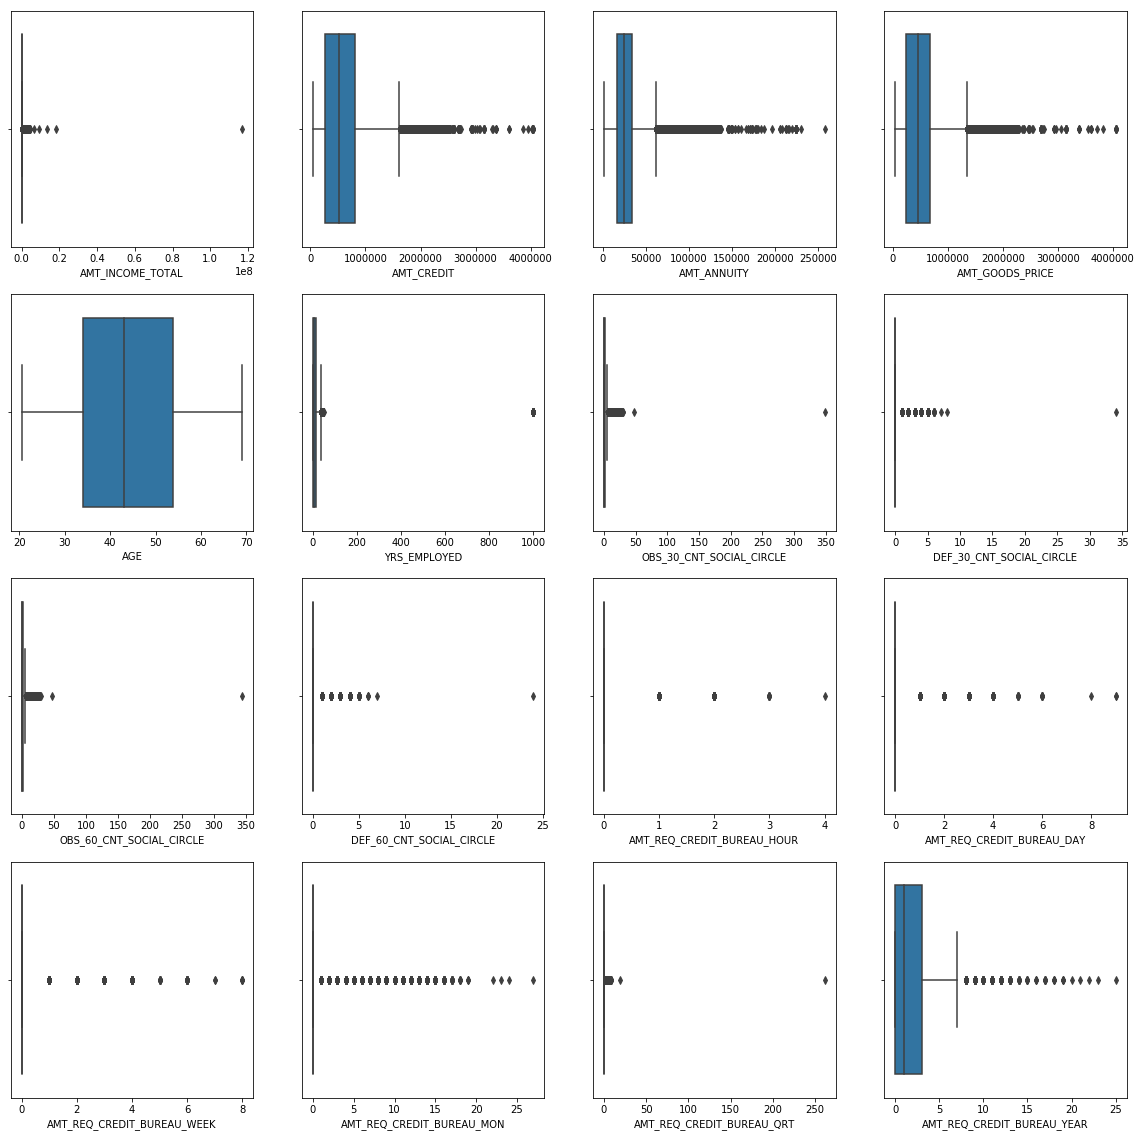

In [137]:
plt.figure(figsize=[20,20])
plt.subplot(4,4,1)
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.subplot(4,4,2)
sns.boxplot(df.AMT_CREDIT)
plt.subplot(4,4,3)
sns.boxplot(df.AMT_ANNUITY)
plt.subplot(4,4,4)
sns.boxplot(df.AMT_GOODS_PRICE)
plt.subplot(4,4,5)
sns.boxplot(df.AGE)
plt.subplot(4,4,6)
sns.boxplot(df.YRS_EMPLOYED)
plt.subplot(4,4,7)
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.subplot(4,4,8)
sns.boxplot(df.DEF_30_CNT_SOCIAL_CIRCLE)
plt.subplot(4,4,9)
sns.boxplot(df.OBS_60_CNT_SOCIAL_CIRCLE)
plt.subplot(4,4,10)
sns.boxplot(df.DEF_60_CNT_SOCIAL_CIRCLE)
plt.subplot(4,4,11)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.subplot(4,4,12)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.subplot(4,4,13)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.subplot(4,4,14)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_MON)
plt.subplot(4,4,15)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.subplot(4,4,16)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)


plt.show()


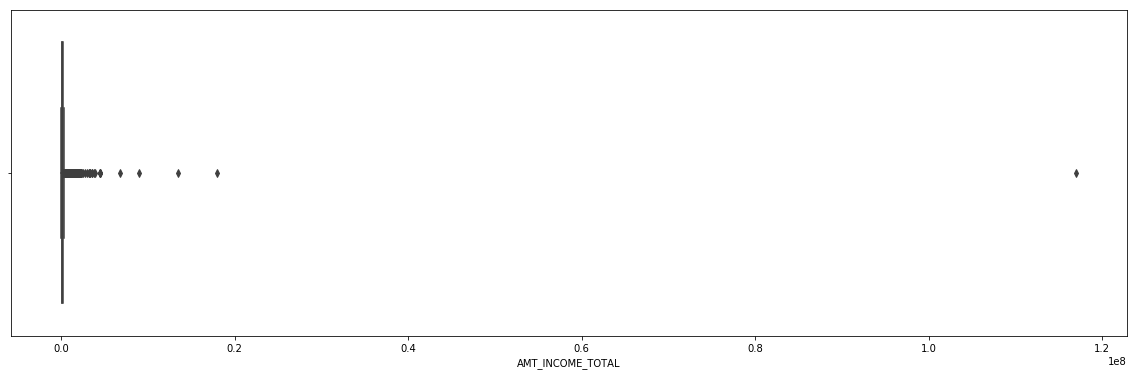

In [138]:
plt.figure(figsize=[20,6])
sns.boxplot(df.AMT_INCOME_TOTAL)

### **ANALYSIS FOR THE OUTLIERS**

#### 1.AMT_INCOME_TOTAL ####
- There are many points which lie outside the quartile ranges and hence this column contains a lot of outliers
- Calculating the number of outliers-

In [139]:
Q1 = df.AMT_INCOME_TOTAL.quantile(0.25)
Q3 = df.AMT_INCOME_TOTAL.quantile(0.75)
IQR = Q3 - Q1
Q3+IQR

292500.0

In [140]:
### Calculating the number of outliers for amount_total_income column by calculating the IQR
len(df.AMT_INCOME_TOTAL[(df.AMT_INCOME_TOTAL > (Q3 + 1.5 * IQR))])

14029

In [141]:
### REMOVING THE OUTLIERS FOR BETTER ANALYSIS
df=df[~(df.AMT_INCOME_TOTAL > 2*(Q3 + 1.5 * IQR))]
len(df)

306467

**CONCLUSION** - There are around 5568 outliers in this column and what we observe is few of them have income over 4 million which is much greater than the mean

#### 2.AMT_CREDIT

In [142]:
Q1 = df.AMT_CREDIT.quantile(0.25)
Q3 = df.AMT_CREDIT.quantile(0.75)
IQR = Q3 - Q1
IQR

538650.0

In [143]:
### Calculating the number of outliers for amount_total_income column by calculating the IQR
len(df.AMT_CREDIT[(df.AMT_CREDIT > (Q3 + 1.5 * IQR))])

6392

In [144]:
### REMOVING THE OUTLIERS FOR BETTER ANALYSIS
df=df[~(df.AMT_CREDIT > (Q3 + 1.5 * IQR))]
len(df)

300075

#### 3.DAYS_EMPLOYED

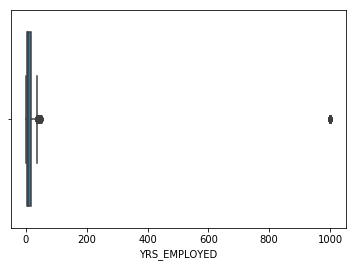

In [145]:
sns.boxplot(df.YRS_EMPLOYED)

In [146]:
Q1 = df.YRS_EMPLOYED.quantile(0.25)
Q3 = df.YRS_EMPLOYED.quantile(0.75)
IQR = Q3 - Q1
Q3+1.5*IQR

35.47945205479452

In [147]:
### Calculating the number of outliers for amount_total_income column by calculating the IQR
len(df[(df.YRS_EMPLOYED > 2*(Q3 + 1.5 * IQR))])

54509

In [251]:
df[(df.YRS_EMPLOYED > 2*(Q3 + 1.5 * IQR))].head()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YRS_EMPLOYED,Hourly_Bucket,Age_Bucket,Income_Bucket,Num-Children,Size_Family
8,100011,No,0.587334,0.205747,0.751724,Cash loans,F,Secondary / secondary special,XNA,Retired,Pensioner,Married,2.0,0,112500.000,1019610.0,33826.5,913500.0,Y,House / apartment,N,0.018634,2,2,1.0,0.0,1.0,0.0,WEDNESDAY,14,Children,0.0,0.0,0.0,0.0,0.0,1.0,55.065753,1000.665753,afternoon,senior_citizen,lower-middle,No children,2 members
11,100015,No,0.722044,0.555183,0.652897,Cash loans,F,Secondary / secondary special,XNA,Retired,Pensioner,Married,2.0,0,38419.155,148365.0,10678.5,135000.0,Y,House / apartment,N,0.015221,2,2,0.0,0.0,0.0,0.0,FRIDAY,7,Children,0.0,0.0,0.0,0.0,0.0,2.0,55.936986,1000.665753,morning,senior_citizen,low,No children,2 members
23,100027,No,NaN,0.624305,0.669057,Cash loans,F,Secondary / secondary special,XNA,Retired,Pensioner,Married,2.0,0,83250.000,239850.0,23850.0,225000.0,Y,House / apartment,N,0.006296,3,3,0.0,0.0,0.0,0.0,FRIDAY,12,Unaccompanied,0.0,0.0,0.0,0.0,0.0,3.0,68.019178,1000.665753,morning,senior_citizen,low,No children,2 members
38,100045,No,NaN,0.650765,0.751724,Cash loans,F,Secondary / secondary special,XNA,Retired,Pensioner,Married,2.0,0,99000.000,247275.0,17338.5,225000.0,Y,House / apartment,N,0.006207,2,2,0.0,0.0,0.0,0.0,FRIDAY,11,Unaccompanied,0.0,0.0,0.0,0.0,0.0,2.0,65.534247,1000.665753,morning,senior_citizen,low,No children,2 members
43,100050,No,NaN,0.766138,0.684828,Cash loans,F,Higher education,XNA,Retired,Pensioner,Single / not married,1.0,0,108000.000,746280.0,42970.5,675000.0,Y,House / apartment,N,0.010966,2,2,0.0,0.0,0.0,0.0,WEDNESDAY,9,Unaccompanied,0.0,0.0,0.0,0.0,0.0,3.0,64.515068,1000.665753,morning,senior_citizen,lower-middle,No children,1 member


**OBSERVATION AND ANALYSIS** - Here we see that for all the retired people who are getting **pensions** the DAYS_EMPLOYED is more than 1000 years which is wrong but we can't drop those values hence we will replace those VALUES with the max cap value.

In [149]:
### Replacing the outliers with max value of Days_Employed

### **BINNING DIFFERENT VARIABLES**

In [150]:
df.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YRS_EMPLOYED
0,100002,Yes,0.083037,0.262949,0.139376,Cash loans,M,Secondary / secondary special,-9461.0,-637.0,Business Entity Type 3,Laborers,Working,Single / not married,1.0,0,202500.0,406597.5,24700.5,351000.0,Y,House / apartment,N,0.018801,2,2,2.0,2.0,2.0,2.0,WEDNESDAY,10,Unaccompanied,-3648.0,-2120,1,1,0,1,1,0,0,0,0,0,0,0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205
1,100003,No,0.311267,0.622246,NaN,Cash loans,F,Higher education,-16765.0,-1188.0,School,Core staff,State servant,Married,2.0,0,270000.0,1293502.5,35698.5,1129500.0,N,House / apartment,N,0.003541,1,1,1.0,0.0,1.0,0.0,MONDAY,11,Family,-1186.0,-291,1,1,0,1,1,0,0,0,0,0,0,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795
2,100004,No,NaN,0.555912,0.729567,Revolving loans,M,Secondary / secondary special,-19046.0,-225.0,Government,Laborers,Working,Single / not married,1.0,0,67500.0,135000.0,6750.0,135000.0,Y,House / apartment,Y,0.010032,2,2,0.0,0.0,0.0,0.0,MONDAY,9,Unaccompanied,-4260.0,-2531,1,1,1,1,1,0,0,0,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438
3,100006,No,NaN,0.650442,NaN,Cash loans,F,Secondary / secondary special,-19005.0,-3039.0,Business Entity Type 3,Laborers,Working,Civil marriage,2.0,0,135000.0,312682.5,29686.5,297000.0,Y,House / apartment,N,0.008019,2,2,2.0,0.0,2.0,0.0,WEDNESDAY,17,Unaccompanied,-9833.0,-2437,1,1,0,1,0,0,0,0,0,0,0,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.068493,8.326027
4,100007,No,NaN,0.322738,NaN,Cash loans,M,Secondary / secondary special,-19932.0,-3038.0,Religion,Core staff,Working,Single / not married,1.0,0,121500.0,513000.0,21865.5,513000.0,Y,House / apartment,N,0.028663,2,2,0.0,0.0,0.0,0.0,THURSDAY,11,Unaccompanied,-4311.0,-3458,1,1,0,1,0,0,0,0,0,0,1,1,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288


In [151]:
df.HOUR_APPR_PROCESS_START.describe()

count    300075.000000
mean         12.048155
std           3.261216
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [152]:
### binning HOUR_APPR_PROCESS_START variable according to morning,afternoon,evening and night
### 5-12 morning,12-18 afternoon,18-24 evening,0-5 night
df['Hourly_Bucket'] = pd.cut(df.HOUR_APPR_PROCESS_START, bins = [-1,5,12,18,24], labels = ["night", "morning", "afternoon", "evening"])
df['Hourly_Bucket'].head()

0      morning
1      morning
2      morning
3    afternoon
4      morning
Name: Hourly_Bucket, dtype: category
Categories (4, object): [night < morning < afternoon < evening]

In [153]:
df.AGE.describe()

count    300075.000000
mean         43.919463
std          11.994517
min          20.517808
25%          33.931507
50%          43.112329
75%          53.950685
max          69.043836
Name: AGE, dtype: float64

In [154]:
### binning DAYS_BIRTH variable according to young, adults , senior_citizen
### 20-33 young,33-55 adults,55-75 senior citizen
df['Age_Bucket'] = pd.cut(df.AGE, bins = [20,33,55,75], labels = ["young", "adults", "senior_citizen"])
df['Age_Bucket'].head()

0     young
1    adults
2    adults
3    adults
4    adults
Name: Age_Bucket, dtype: category
Categories (3, object): [young < adults < senior_citizen]

In [155]:
df.AMT_INCOME_TOTAL.describe()

count    300075.000000
mean     163647.809571
std       82997.439791
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      675000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [156]:
### binning AMT_INCOME_TOTAL variable according to "low", "lower-middle", "upper-middle","high"
### 20-33 young,33-55 adults,55-75 senior citizen
maximum=max(df.AMT_INCOME_TOTAL)
df['Income_Bucket'] = pd.cut(df.AMT_INCOME_TOTAL, bins = [0,100000,200000,450000,maximum], labels = ["low", "lower-middle", "upper-middle","high"])
df['Income_Bucket'].value_counts()

lower-middle    154326
upper-middle     80255
low              63522
high              1972
Name: Income_Bucket, dtype: int64

In [157]:
# Number of children
df.CNT_CHILDREN.value_counts()

0     210229
1      59591
2      26090
3       3628
4        412
5         83
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [158]:
# binning CNT_CHILDREN variable according to "No children", "1-Child", "2-Children","3-5 Children", "More than 5 children"

df['Num-Children'] = pd.cut(df.CNT_CHILDREN, bins = [-1,0,1,2,5,12], labels = ["No children", "1-Child", "2-Children","3-5 Children", "More than 5 children"])
df['Num-Children'].value_counts()

No children             210229
1-Child                  59591
2-Children               26090
3-5 Children              4123
More than 5 children        37
Name: Num-Children, dtype: int64

In [159]:
# Number of family members

df.CNT_FAM_MEMBERS.value_counts()

2.0     153986
1.0      66902
3.0      51213
4.0      24069
5.0       3392
6.0        393
7.0         80
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [160]:
# binning CNT_FAM_MEMBERS variable according to "1 member","2 members", "3 members", "4 members", "More than 4 members"

df['Size_Family'] = pd.cut(df.CNT_FAM_MEMBERS, bins = [0,1,2,3,4,12], labels = ["1 member", "2 members", "3 members","4 members", "More than 4 members"])
df['Size_Family'].value_counts()

2 members              153986
1 member                66902
3 members               51213
4 members               24069
More than 4 members      3897
Name: Size_Family, dtype: int64

### Dropping the columns that may not be helphul in analysis

In [161]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE',
       'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'FLAG_OWN_CAR',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION

In [162]:
df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],inplace=True)

In [163]:
df.shape

(300075, 44)

## **Data Imbalance** ##

In [164]:
100*df.TARGET.value_counts(normalize = True)

No     91.835041
Yes     8.164959
Name: TARGET, dtype: float64

In [165]:
### dividing the target variable into 2 datasets ie 0 and 1.
df_1 = df[df['TARGET']=='Yes']
df_0 = df[df['TARGET']=='No']

#### **Finding Correlation and Plotting HeatMaps Between Different variables**

In [166]:
df_0.shape

(275574, 44)

In [167]:
df_0.corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YRS_EMPLOYED
EXT_SOURCE_1,1.000000,0.194563,0.167342,-0.101458,-0.141644,0.076534,0.151431,0.101281,0.158966,0.088694,-0.026847,-0.024351,-0.026370,-0.026220,0.026845,-0.001295,-0.003903,0.002955,0.032027,0.002115,0.028053,0.602372,0.303010
EXT_SOURCE_2,0.194563,1.000000,0.083735,-0.002133,-0.015930,0.158241,0.113480,0.113077,0.121352,0.192727,-0.020824,-0.026807,-0.020482,-0.028833,0.155272,-0.002086,0.001701,0.003158,0.049279,0.001960,-0.003441,0.078260,-0.026567
EXT_SOURCE_3,0.167342,0.083735,1.000000,-0.027991,-0.042358,-0.089288,0.029732,0.021903,0.032989,-0.012210,0.001606,-0.032637,0.001289,-0.031039,-0.045345,-0.001811,-0.008436,-0.021132,-0.009199,-0.024431,-0.069955,0.198815,0.113384
CNT_FAM_MEMBERS,-0.101458,-0.002133,-0.027991,1.000000,0.878156,0.037979,0.063602,0.076022,0.061824,-0.024909,0.024335,-0.003603,0.024018,-0.005352,-0.011224,0.001172,0.000631,0.001543,-0.005122,-0.000640,-0.015679,-0.286294,-0.239578
CNT_CHILDREN,-0.141644,-0.015930,-0.042358,0.878156,1.000000,0.032421,0.002939,0.022501,-0.001255,-0.025044,0.015013,-0.002085,0.014691,-0.002290,-0.005516,-0.000106,0.000974,-0.000200,-0.008218,-0.004618,-0.030378,-0.337202,-0.246741
AMT_INCOME_TOTAL,0.076534,0.158241,-0.089288,0.037979,0.032421,1.000000,0.360164,0.450023,0.366942,0.183374,-0.029757,-0.030915,-0.029560,-0.030732,0.086656,0.004351,0.004743,0.011160,0.069150,0.024391,0.071371,-0.082549,-0.172289
AMT_CREDIT,0.151431,0.113480,0.029732,0.063602,0.002939,0.360164,1.000000,0.747236,0.984433,0.074232,0.003603,-0.015930,0.003642,-0.018330,0.045326,-0.002082,0.003641,0.001022,0.049303,0.023880,-0.014093,0.048999,-0.067868
AMT_ANNUITY,0.101281,0.113077,0.021903,0.076022,0.022501,0.450023,0.747236,1.000000,0.752655,0.100702,-0.010100,-0.019152,-0.009894,-0.019949,0.046330,0.003752,0.001261,0.012911,0.030589,0.012350,0.007107,-0.018406,-0.106541
AMT_GOODS_PRICE,0.158966,0.121352,0.032989,0.061824,-0.001255,0.366942,0.984433,0.752655,1.000000,0.079158,0.003598,-0.017377,0.003607,-0.019508,0.055574,-0.001434,0.004000,0.001190,0.051407,0.024390,-0.016263,0.046694,-0.065931
REGION_POPULATION_RELATIVE,0.088694,0.192727,-0.012210,-0.024909,-0.025044,0.183374,0.074232,0.100702,0.079158,1.000000,-0.010472,0.007143,-0.009971,0.003830,0.168017,-0.002000,0.001251,-0.002562,0.069652,-0.001574,0.001985,0.025061,-0.005309


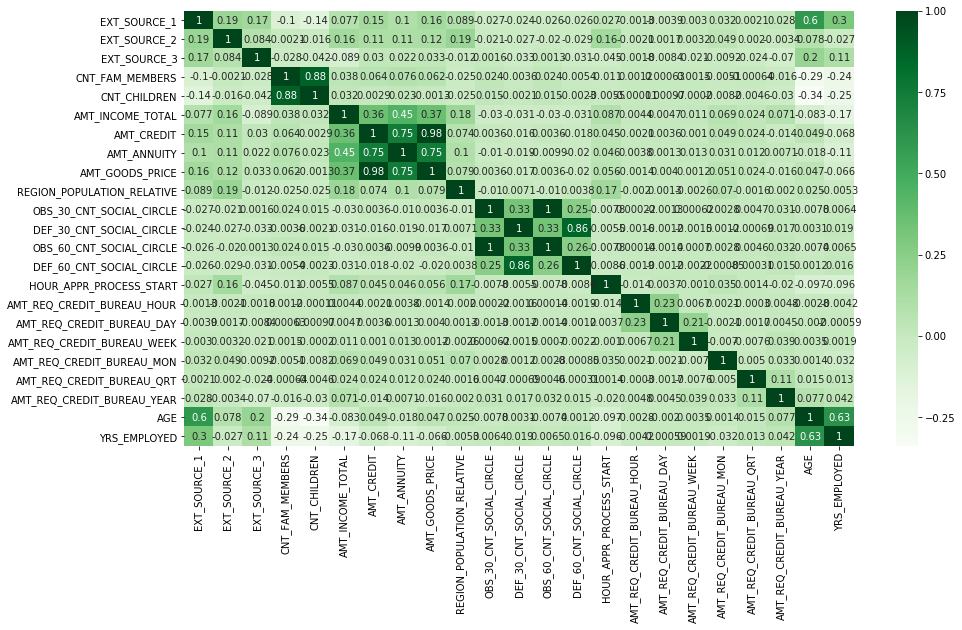

In [168]:
plt.figure(figsize=[15,8])
sns.heatmap(df_0.corr(),annot=True,cmap='Greens')

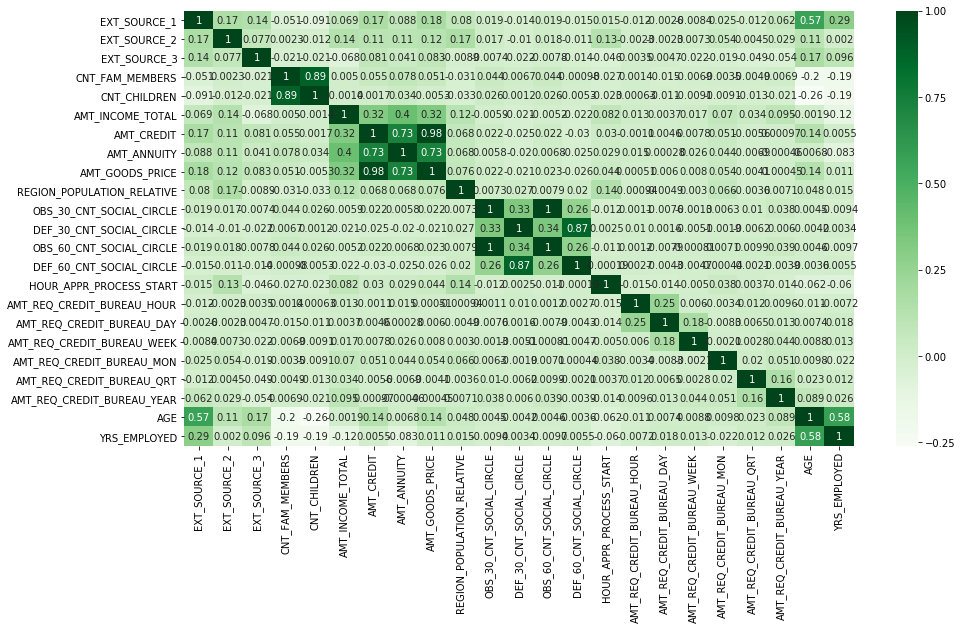

In [169]:
plt.figure(figsize=[15,8])
sns.heatmap(df_1.corr(),annot=True,cmap='Greens')

#### **TOP 10 CORRELATED VARIABLES FOR BOTH DEFAULT AND NON-DEFAULT**

In [170]:
corr = df_1.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.iloc[0:23]

,VAR1,VAR2,Correlation_Value,Corr_abs
286,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998285,0.998285
190,AMT_GOODS_PRICE,AMT_CREDIT,0.980285,0.980285
95,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885237,0.885237
310,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868859,0.868859
191,AMT_GOODS_PRICE,AMT_ANNUITY,0.732947,0.732947
167,AMT_ANNUITY,AMT_CREDIT,0.731457,0.731457
527,YRS_EMPLOYED,AGE,0.584187,0.584187
483,AGE,EXT_SOURCE_1,0.571411,0.571411
166,AMT_ANNUITY,AMT_INCOME_TOTAL,0.402829,0.402829
287,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.338185,0.338185


In [171]:
corr = df_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df['Corr_abs'] = abs(corr_df['Correlation_Value'])
corr_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df.iloc[0:23]

,VAR1,VAR2,Correlation_Value,Corr_abs
286,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,0.998510
190,AMT_GOODS_PRICE,AMT_CREDIT,0.984433,0.984433
95,CNT_CHILDREN,CNT_FAM_MEMBERS,0.878156,0.878156
310,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.860019,0.860019
191,AMT_GOODS_PRICE,AMT_ANNUITY,0.752655,0.752655
167,AMT_ANNUITY,AMT_CREDIT,0.747236,0.747236
527,YRS_EMPLOYED,AGE,0.629567,0.629567
483,AGE,EXT_SOURCE_1,0.602372,0.602372
166,AMT_ANNUITY,AMT_INCOME_TOTAL,0.450023,0.450023
189,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.366942,0.366942


## **UNIVARIATE AND BIVARIATE**

Univariate:
    - Continuous Variable
    - Categorical Variable

Bivariate Anlysis:
    - Conti-Conti
    - Categorical-Categorical
    - Conti-Categorical


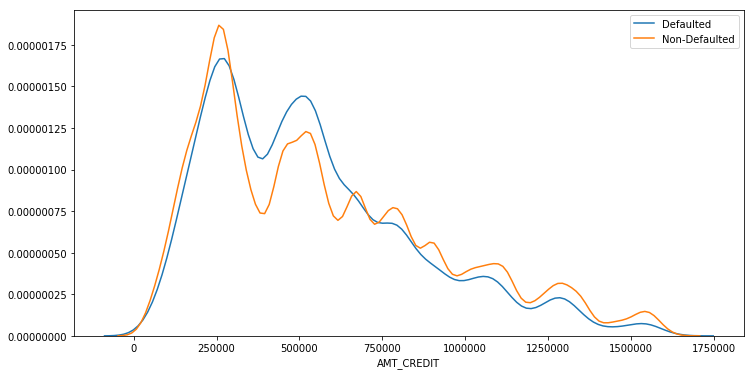

In [172]:
plt.figure(figsize=[12,6])
sns.distplot(df_1['AMT_CREDIT'], hist = False, label = 'Defaulted')
sns.distplot(df_0['AMT_CREDIT'], hist = False, label = 'Non-Defaulted')
sns.distplot
plt.show()

**CONCLUSION** - From the above curve we can say that for Amount Credit both the curves are almost **normally distributed** for both Defaulted and Non-Defaulted targets.

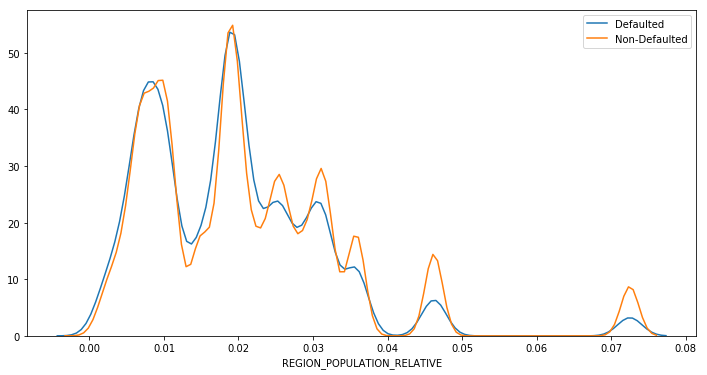

In [173]:

plt.figure(figsize=[12,6])
sns.distplot(df_1['REGION_POPULATION_RELATIVE'], hist = False, label = 'Defaulted')
sns.distplot(df_0['REGION_POPULATION_RELATIVE'], hist = False, label = 'Non-Defaulted')
plt.show()

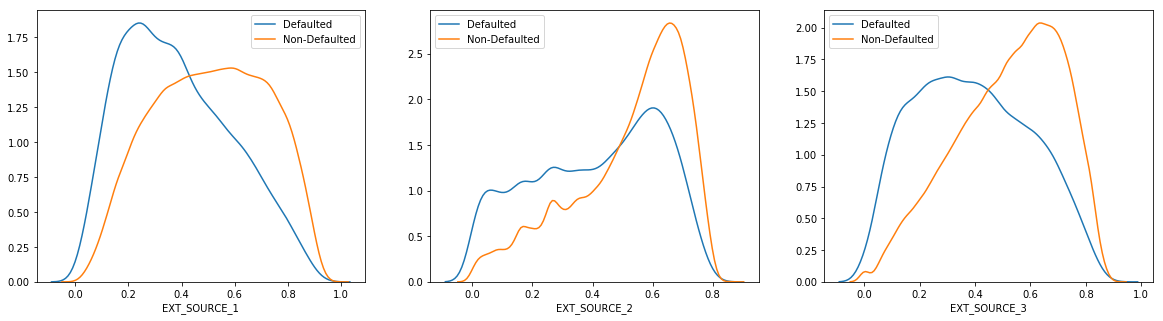

In [174]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(df_1['EXT_SOURCE_1'], hist = False, label = 'Defaulted')
sns.distplot(df_0['EXT_SOURCE_1'], hist = False, label = 'Non-Defaulted')

plt.subplot(1,3,2)
sns.distplot(df_1['EXT_SOURCE_2'], hist = False, label = 'Defaulted')
sns.distplot(df_0['EXT_SOURCE_2'], hist = False, label = 'Non-Defaulted')

plt.subplot(1,3,3)
sns.distplot(df_1['EXT_SOURCE_3'], hist = False, label = 'Defaulted')
sns.distplot(df_0['EXT_SOURCE_3'], hist = False, label = 'Non-Defaulted')
plt.show()

**CONCLUSION** - With the Extenal rating of 0.5 and above there is more chance of the customer paying back the loan.

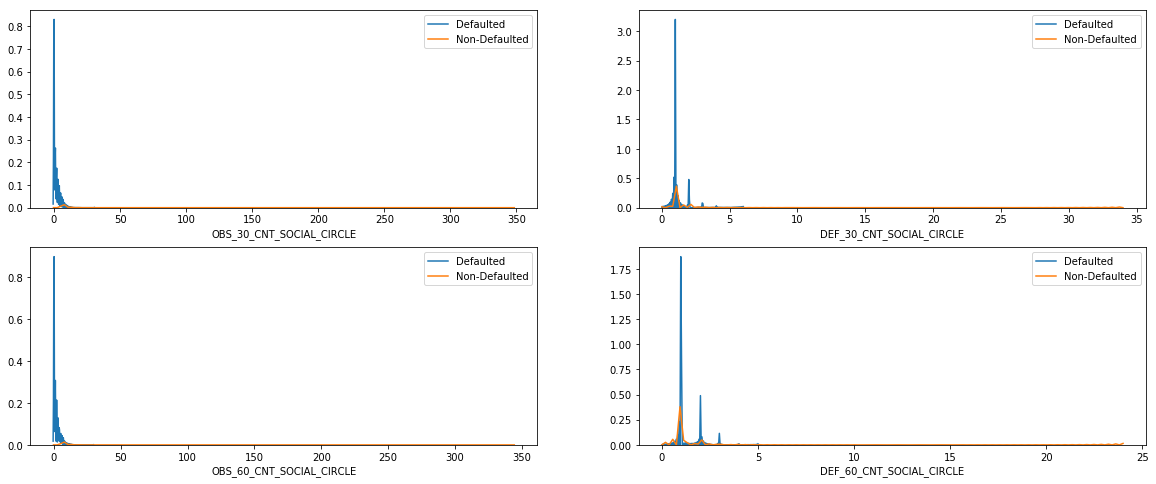

In [175]:
plt.figure(figsize=[20,8])

plt.subplot(2,2,1)
sns.distplot(df_1['OBS_30_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Defaulted')
sns.distplot(df_0['OBS_30_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Non-Defaulted')

plt.subplot(2,2,2)
sns.distplot(df_1['DEF_30_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Defaulted')
sns.distplot(df_0['DEF_30_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Non-Defaulted')

plt.subplot(2,2,3)
sns.distplot(df_1['OBS_60_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Defaulted')
sns.distplot(df_0['OBS_60_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Non-Defaulted')

plt.subplot(2,2,4)
sns.distplot(df_1['DEF_60_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Defaulted')
sns.distplot(df_0['DEF_60_CNT_SOCIAL_CIRCLE'], hist = False, label = 'Non-Defaulted')
plt.show()

**CONCLUSION** - There is a small likelyhood that a customer who has a defaulter in his social circle might defalut as well. But this probability is negligible.

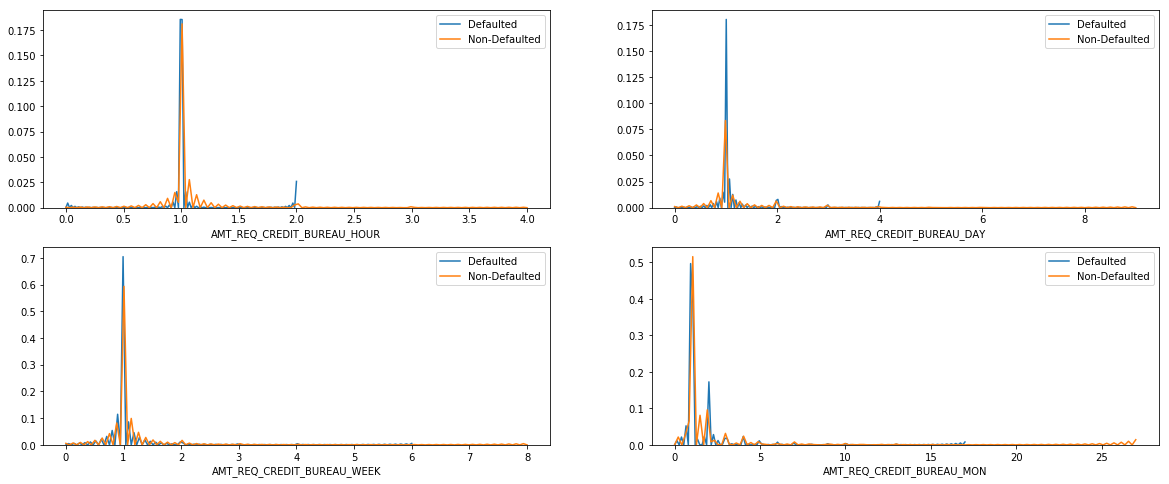

In [176]:
plt.figure(figsize=[20,8])

plt.subplot(2,2,1)
sns.distplot(df_1['AMT_REQ_CREDIT_BUREAU_HOUR'], hist = False, label = 'Defaulted')
sns.distplot(df_0['AMT_REQ_CREDIT_BUREAU_HOUR'], hist = False, label = 'Non-Defaulted')

plt.subplot(2,2,2)
sns.distplot(df_1['AMT_REQ_CREDIT_BUREAU_DAY'], hist = False, label = 'Defaulted')
sns.distplot(df_0['AMT_REQ_CREDIT_BUREAU_DAY'], hist = False, label = 'Non-Defaulted')

plt.subplot(2,2,3)
sns.distplot(df_1['AMT_REQ_CREDIT_BUREAU_WEEK'], hist = False, label = 'Defaulted')
sns.distplot(df_0['AMT_REQ_CREDIT_BUREAU_WEEK'], hist = False, label = 'Non-Defaulted')

plt.subplot(2,2,4)
sns.distplot(df_1['AMT_REQ_CREDIT_BUREAU_MON'], hist = False, label = 'Defaulted')
sns.distplot(df_0['AMT_REQ_CREDIT_BUREAU_MON'], hist = False, label = 'Non-Defaulted')
plt.show()

**CONCLUSION** - There is not much that we can gather from this inforamtion

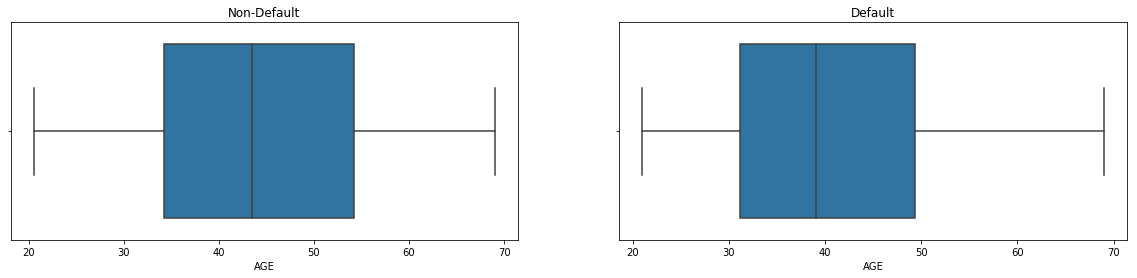

In [177]:
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title("Non-Default")
sns.boxplot(df_0.AGE)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(df_1.AGE)

**CONCUSION** - From the above analysis we can observe 2 points-
    1. Median(Non-Default)>Median(Default)
    2. People who are young tends to default more in comparison to people who are older.

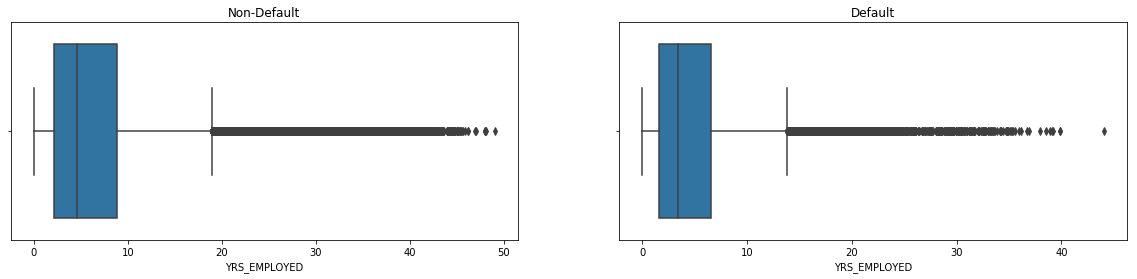

In [178]:
### analysing the days_employed column
### uni-continuous

plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title("Non-Default")
sns.boxplot(df_0[df_0.YRS_EMPLOYED<60].YRS_EMPLOYED)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(df_1[df_1.YRS_EMPLOYED<60].YRS_EMPLOYED)

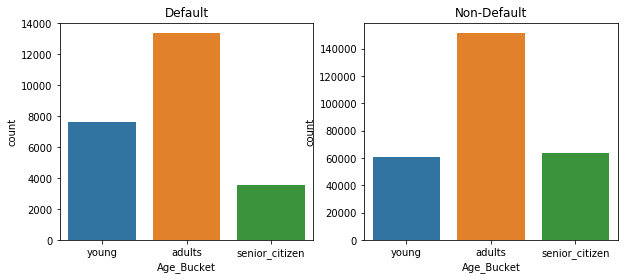

In [179]:
## Uni-Categorical

## analysis on the age bucket which was created
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(df_1['Age_Bucket'])


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.countplot(df_0['Age_Bucket'])

**CONCLUSION**
 - Young people(age between 20-33) Around 4000 young people tend to default.
 - Adults(age between 33-55) Most defaults are from this age group.
 -Senior (age between 55-75) Least defaults are from this age group.
 
 - **The above analysis shows that our target should be the age group between 33-55 as these people are most vulnerable candidates who can default maybe because they are already supporting their parents,children and maybe not settled yet and hence can be considered hot targets.**
 - **The senior citizen are less likely to default as maybe they have pensions and savings from their earnings.**

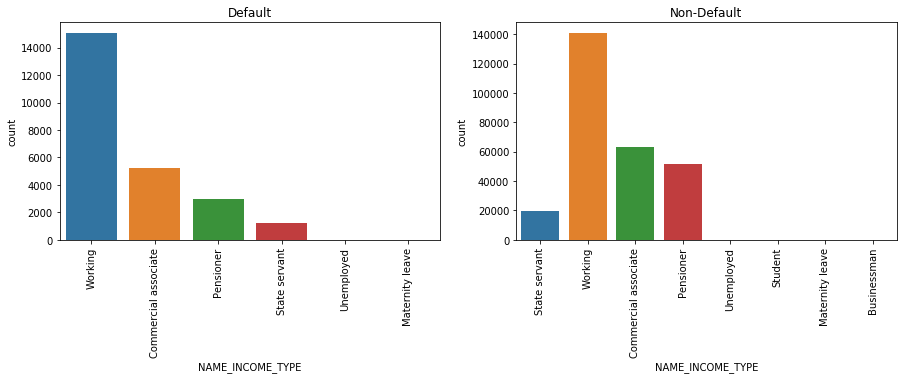

In [180]:
## Uni-Categorical

## analysis on the income bucket which was created
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_INCOME_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_INCOME_TYPE'])
plt.show()

**CONCLUSION** - Most of the people defaulted belong to the Working class,whereas State servants are defaulted the least(As they have to keep clean records for their status)

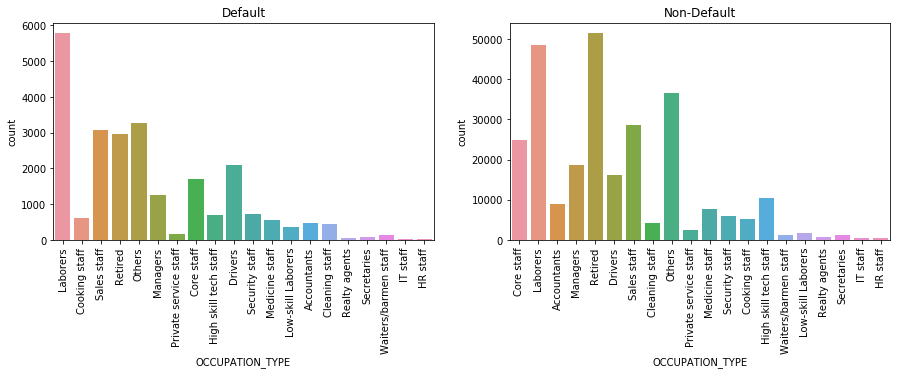

In [181]:
## analysis on the Occupation_type bucket which was created
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['OCCUPATION_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['OCCUPATION_TYPE'])
plt.show()

**CONCLUSION** - A retired person is more likely to pay back the loan and laborers are likely to default more. Those whose occupation type is "Drivers" are also one of the likely candidates to defalut more.

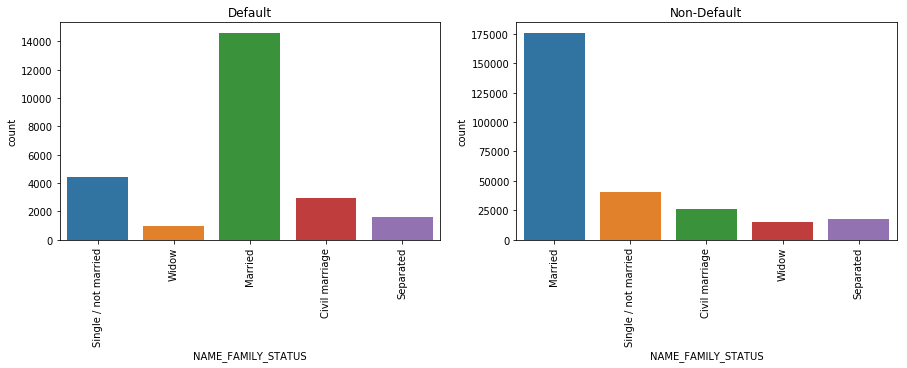

In [182]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_FAMILY_STATUS'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_FAMILY_STATUS'])
plt.show()

**CONCLUSION** - Married people are the highest in the default category wheras widowed are the lowest who are getting defaulted.

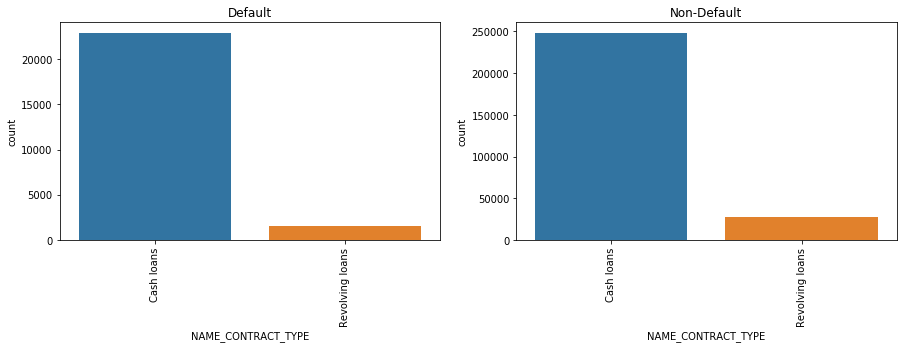

In [183]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_CONTRACT_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_CONTRACT_TYPE'])
plt.show()

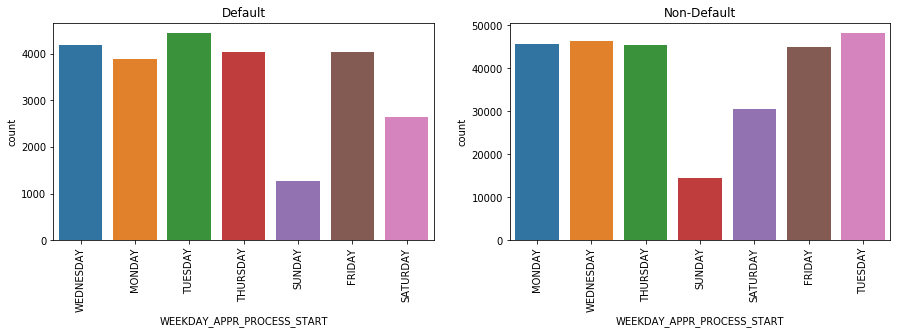

In [184]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['WEEKDAY_APPR_PROCESS_START'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['WEEKDAY_APPR_PROCESS_START'])
plt.show()


In [185]:
df_1

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YRS_EMPLOYED,Hourly_Bucket,Age_Bucket,Income_Bucket,Num-Children,Size_Family
0,100002,Yes,0.083037,0.262949,0.139376,Cash loans,M,Secondary / secondary special,Business Entity Type 3,Laborers,Working,Single / not married,1.0,0,202500.0,406597.5,24700.5,351000.0,Y,House / apartment,N,0.018801,2,2,2.0,2.0,2.0,2.0,WEDNESDAY,10,Unaccompanied,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,morning,young,upper-middle,No children,1 member
26,100031,Yes,NaN,0.548477,0.190706,Cash loans,F,Secondary / secondary special,Business Entity Type 3,Cooking staff,Working,Widow,1.0,0,112500.0,979992.0,27076.5,702000.0,Y,House / apartment,N,0.018029,3,2,10.0,1.0,10.0,0.0,MONDAY,9,Unaccompanied,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,7.200000,morning,adults,lower-middle,No children,1 member
40,100047,Yes,NaN,0.306841,0.320163,Cash loans,M,Secondary / secondary special,Business Entity Type 3,Laborers,Commercial associate,Married,2.0,0,202500.0,1193580.0,35028.0,855000.0,Y,House / apartment,N,0.025164,2,2,0.0,0.0,0.0,0.0,TUESDAY,9,Unaccompanied,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,3.457534,morning,adults,upper-middle,No children,2 members
42,100049,Yes,0.468208,0.674203,0.399676,Cash loans,F,Secondary / secondary special,Self-employed,Sales staff,Working,Civil marriage,2.0,0,135000.0,288873.0,16258.5,238500.0,N,House / apartment,N,0.007305,3,3,1.0,0.0,1.0,0.0,THURSDAY,11,Unaccompanied,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,9.854795,morning,adults,lower-middle,No children,2 members
81,100096,Yes,NaN,0.023952,0.720944,Cash loans,F,Secondary / secondary special,XNA,Retired,Pensioner,Married,2.0,0,81000.0,252000.0,14593.5,252000.0,Y,House / apartment,N,0.028663,2,2,1.0,1.0,1.0,1.0,THURSDAY,10,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,1000.665753,morning,senior_citizen,low,No children,2 members
94,100112,Yes,NaN,0.432340,0.077499,Cash loans,M,Incomplete higher,Industry: type 4,Others,Commercial associate,Single / not married,1.0,0,315000.0,953460.0,64107.0,900000.0,Y,With parents,Y,0.030755,2,2,0.0,0.0,0.0,0.0,SUNDAY,13,Family,0.0,0.0,0.0,0.0,0.0,2.0,27.942466,5.520548,afternoon,young,upper-middle,No children,1 member
110,100130,Yes,NaN,0.282069,0.120641,Cash loans,F,Incomplete higher,Trade: type 2,Sales staff,Commercial associate,Separated,2.0,1,157500.0,723996.0,30802.5,585000.0,Y,House / apartment,N,0.007274,2,2,0.0,0.0,0.0,0.0,SUNDAY,12,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,28.838356,0.731507,morning,young,lower-middle,1-Child,2 members
138,100160,Yes,0.320322,0.631961,0.289611,Cash loans,M,Higher education,Business Entity Type 3,Managers,Working,Married,2.0,0,292500.0,675000.0,36747.0,675000.0,Y,House / apartment,N,0.035792,2,2,0.0,0.0,0.0,0.0,FRIDAY,18,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,45.663014,0.547945,afternoon,adults,upper-middle,No children,2 members
154,100181,Yes,NaN,0.182171,0.443615,Cash loans,F,Secondary / secondary special,Business Entity Type 3,Private service staff,Working,Single / not married,1.0,0,157500.0,245619.0,12667.5,166500.0,Y,House / apartment,N,0.022625,2,2,0.0,0.0,0.0,0.0,TUESDAY,9,Unaccompanied,0.0,0.0,0.0,0.0,0.0,6.0,48.049315,21.030137,morning,adults,lower-middle,No children,1 member
163,100192,Yes,NaN,0.086253,0.513694,Cash loans,F,Secondary / secondary special,Trade: type 3,Core staff,Commercial associate,Single / not marrie

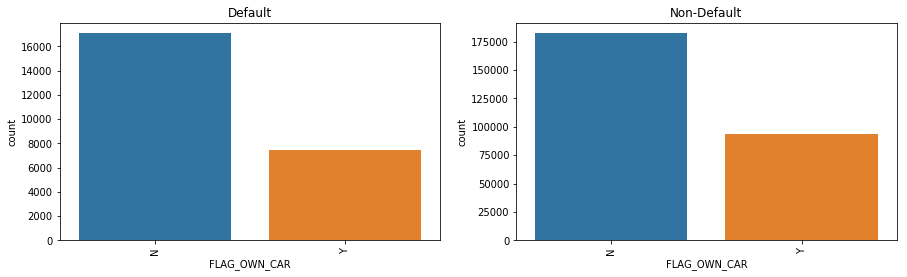

In [186]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['FLAG_OWN_CAR'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['FLAG_OWN_CAR'])
plt.show()

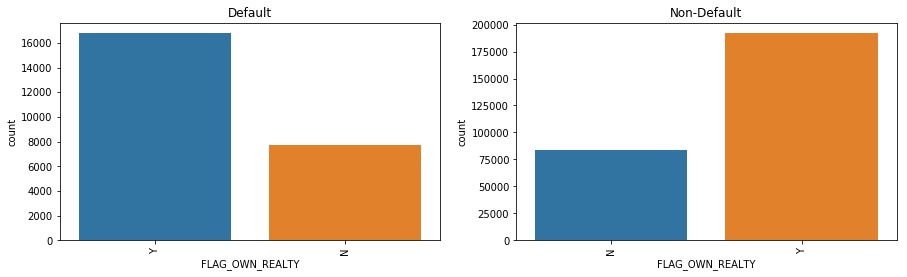

In [187]:

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['FLAG_OWN_REALTY'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['FLAG_OWN_REALTY'])
plt.show()

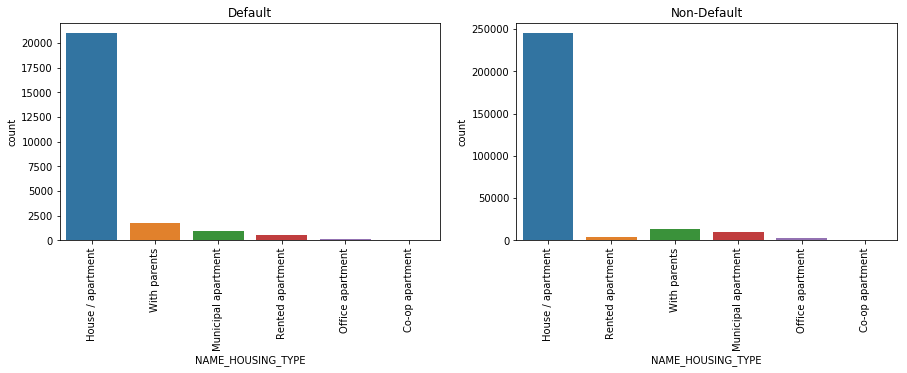

In [188]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_HOUSING_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_HOUSING_TYPE'])
plt.show()

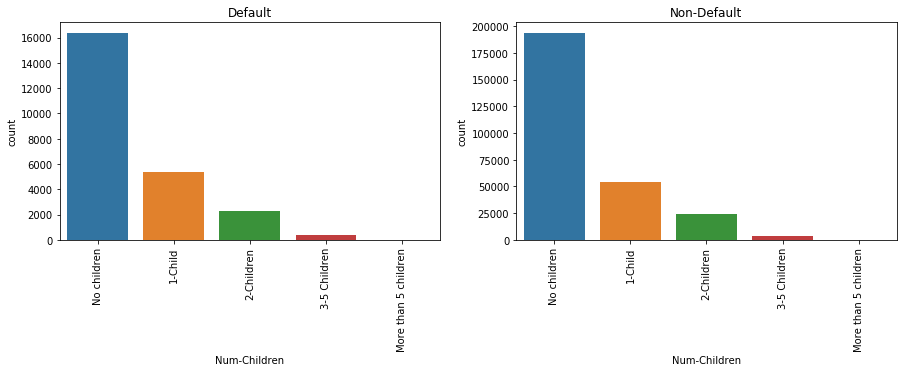

In [189]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['Num-Children'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['Num-Children'])
plt.show()

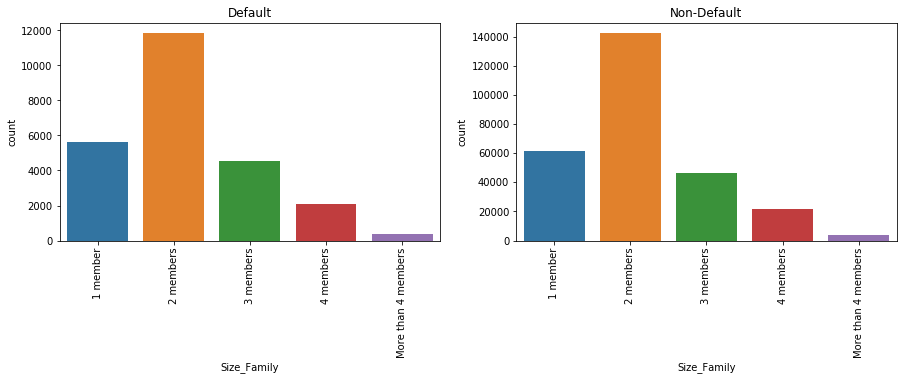

In [190]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['Size_Family'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['Size_Family'])
plt.show()

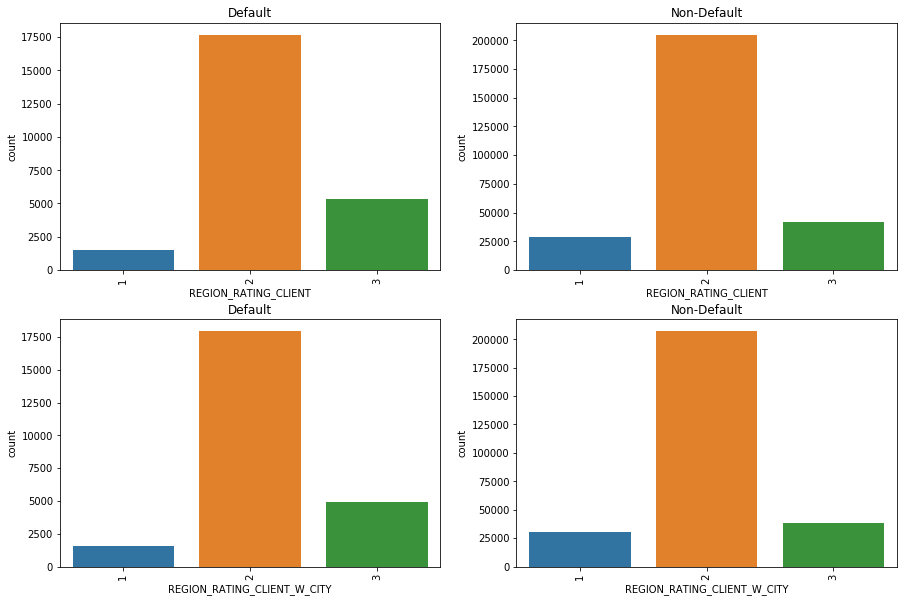

In [191]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['REGION_RATING_CLIENT'])


plt.subplot(2,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['REGION_RATING_CLIENT'])

plt.subplot(2,2,3)
plt.title("Default")
plt.xticks(rotation=90)
sns.countplot(df_1['REGION_RATING_CLIENT_W_CITY'])

plt.subplot(2,2,4)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['REGION_RATING_CLIENT_W_CITY'])


plt.show()


In [192]:
df_1

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YRS_EMPLOYED,Hourly_Bucket,Age_Bucket,Income_Bucket,Num-Children,Size_Family
0,100002,Yes,0.083037,0.262949,0.139376,Cash loans,M,Secondary / secondary special,Business Entity Type 3,Laborers,Working,Single / not married,1.0,0,202500.0,406597.5,24700.5,351000.0,Y,House / apartment,N,0.018801,2,2,2.0,2.0,2.0,2.0,WEDNESDAY,10,Unaccompanied,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,morning,young,upper-middle,No children,1 member
26,100031,Yes,NaN,0.548477,0.190706,Cash loans,F,Secondary / secondary special,Business Entity Type 3,Cooking staff,Working,Widow,1.0,0,112500.0,979992.0,27076.5,702000.0,Y,House / apartment,N,0.018029,3,2,10.0,1.0,10.0,0.0,MONDAY,9,Unaccompanied,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,7.200000,morning,adults,lower-middle,No children,1 member
40,100047,Yes,NaN,0.306841,0.320163,Cash loans,M,Secondary / secondary special,Business Entity Type 3,Laborers,Commercial associate,Married,2.0,0,202500.0,1193580.0,35028.0,855000.0,Y,House / apartment,N,0.025164,2,2,0.0,0.0,0.0,0.0,TUESDAY,9,Unaccompanied,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,3.457534,morning,adults,upper-middle,No children,2 members
42,100049,Yes,0.468208,0.674203,0.399676,Cash loans,F,Secondary / secondary special,Self-employed,Sales staff,Working,Civil marriage,2.0,0,135000.0,288873.0,16258.5,238500.0,N,House / apartment,N,0.007305,3,3,1.0,0.0,1.0,0.0,THURSDAY,11,Unaccompanied,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,9.854795,morning,adults,lower-middle,No children,2 members
81,100096,Yes,NaN,0.023952,0.720944,Cash loans,F,Secondary / secondary special,XNA,Retired,Pensioner,Married,2.0,0,81000.0,252000.0,14593.5,252000.0,Y,House / apartment,N,0.028663,2,2,1.0,1.0,1.0,1.0,THURSDAY,10,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,1000.665753,morning,senior_citizen,low,No children,2 members
94,100112,Yes,NaN,0.432340,0.077499,Cash loans,M,Incomplete higher,Industry: type 4,Others,Commercial associate,Single / not married,1.0,0,315000.0,953460.0,64107.0,900000.0,Y,With parents,Y,0.030755,2,2,0.0,0.0,0.0,0.0,SUNDAY,13,Family,0.0,0.0,0.0,0.0,0.0,2.0,27.942466,5.520548,afternoon,young,upper-middle,No children,1 member
110,100130,Yes,NaN,0.282069,0.120641,Cash loans,F,Incomplete higher,Trade: type 2,Sales staff,Commercial associate,Separated,2.0,1,157500.0,723996.0,30802.5,585000.0,Y,House / apartment,N,0.007274,2,2,0.0,0.0,0.0,0.0,SUNDAY,12,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,28.838356,0.731507,morning,young,lower-middle,1-Child,2 members
138,100160,Yes,0.320322,0.631961,0.289611,Cash loans,M,Higher education,Business Entity Type 3,Managers,Working,Married,2.0,0,292500.0,675000.0,36747.0,675000.0,Y,House / apartment,N,0.035792,2,2,0.0,0.0,0.0,0.0,FRIDAY,18,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,45.663014,0.547945,afternoon,adults,upper-middle,No children,2 members
154,100181,Yes,NaN,0.182171,0.443615,Cash loans,F,Secondary / secondary special,Business Entity Type 3,Private service staff,Working,Single / not married,1.0,0,157500.0,245619.0,12667.5,166500.0,Y,House / apartment,N,0.022625,2,2,0.0,0.0,0.0,0.0,TUESDAY,9,Unaccompanied,0.0,0.0,0.0,0.0,0.0,6.0,48.049315,21.030137,morning,adults,lower-middle,No children,1 member
163,100192,Yes,NaN,0.086253,0.513694,Cash loans,F,Secondary / secondary special,Trade: type 3,Core staff,Commercial associate,Single / not marrie

## **BIVARIATE ANALYSIS**

#### **1.CONTI-CONTI ANALYSIS**

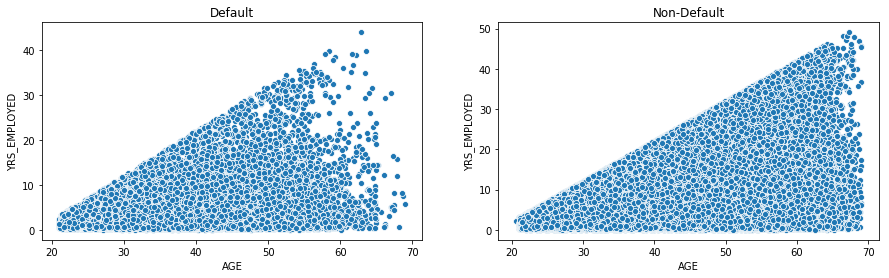

In [193]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(df_1['AGE'],df_1[df_1.YRS_EMPLOYED<60].YRS_EMPLOYED)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(df_0['AGE'], df_0[df_0.YRS_EMPLOYED<60].YRS_EMPLOYED)
plt.show()

**CONCLUSION** -

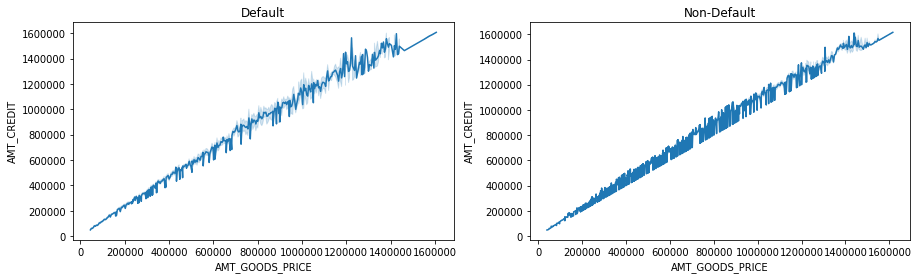

In [194]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.lineplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.lineplot(df_0['AMT_GOODS_PRICE'], df_0['AMT_CREDIT'])
plt.show()

**CONCLUSION** - From the above curve we can establish that there is a **linear relationship** between AMT_CREDIT AND AMT_GOODS_PRICE.

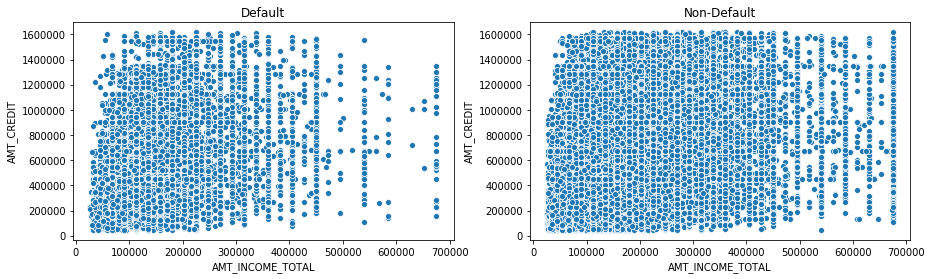

In [195]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=df_0)
plt.show()

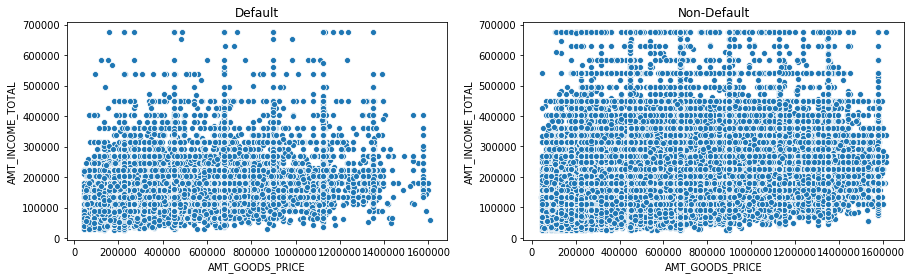

In [196]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL',data=df_0)

plt.show()

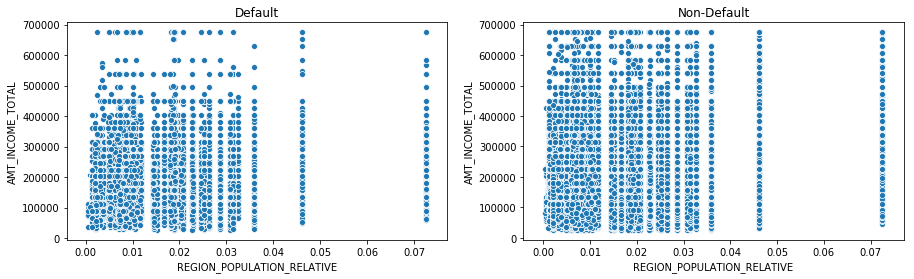

In [197]:

# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='REGION_POPULATION_RELATIVE',y='AMT_INCOME_TOTAL',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(x='REGION_POPULATION_RELATIVE',y='AMT_INCOME_TOTAL',data=df_0)
plt.show()

**CONCLUSION** - From the above curve we can establish that there is relationship between people defaulting,population density and income ie

**AS THE REGION_POPULATION_RELATIVE AND AMT_TOTAL_INCOME increases the no of defaults decreases hence it has a negative correlation**

#### **2.CONTI-CATEGORICAL ANALYSIS**

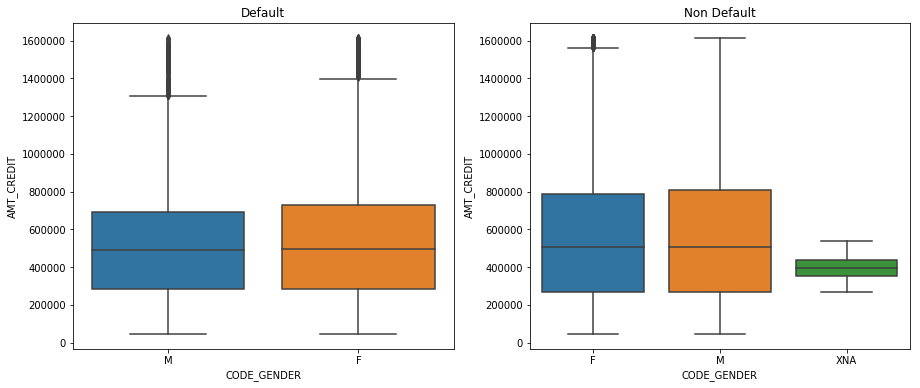

In [198]:
# Bivariate - Conti-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "CODE_GENDER", y = 'AMT_CREDIT', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.boxplot(x = "CODE_GENDER", y = 'AMT_CREDIT', data = df_0)
plt.show()

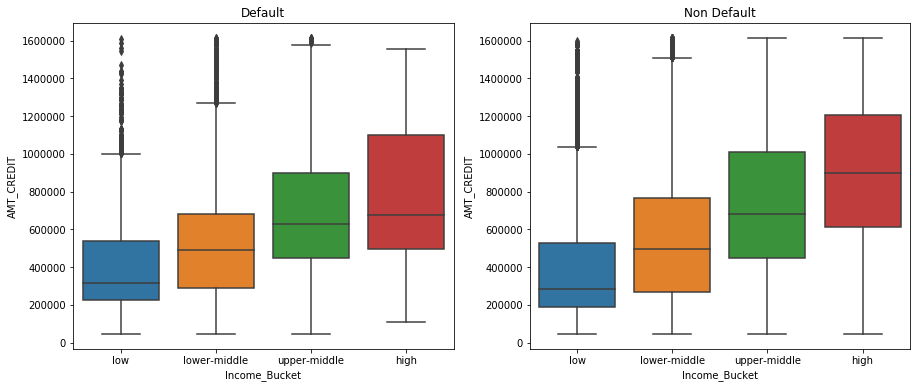

In [199]:
# Bivariate - Conti-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "Income_Bucket", y = 'AMT_CREDIT', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.boxplot(x = "Income_Bucket", y = 'AMT_CREDIT', data = df_0)

**CONCLUSION**-As the value of Income increases the value of Amount CREDIT also increases thus giving us the above insight.

#### **3.CATEGORICAL-CATEGORICAL ANALYSIS**

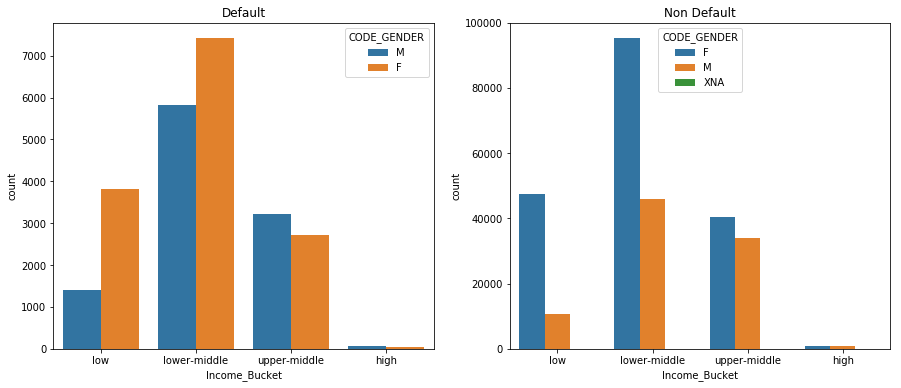

In [200]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "Income_Bucket", hue = 'CODE_GENDER', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "Income_Bucket", hue = 'CODE_GENDER', data = df_0)
plt.show()

**CONCLUSION** -

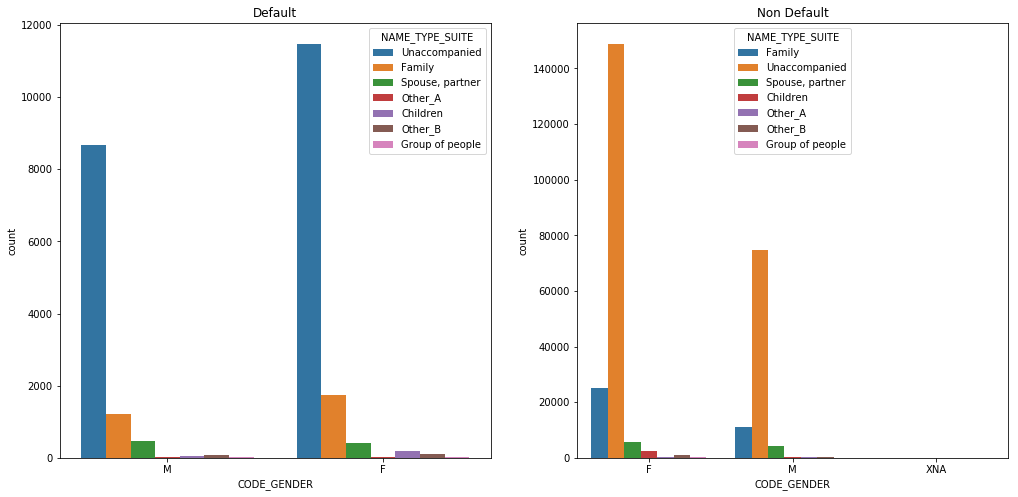

In [201]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (17, 8))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "CODE_GENDER", hue = 'NAME_TYPE_SUITE', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "CODE_GENDER", hue = 'NAME_TYPE_SUITE', data = df_0)
plt.show()

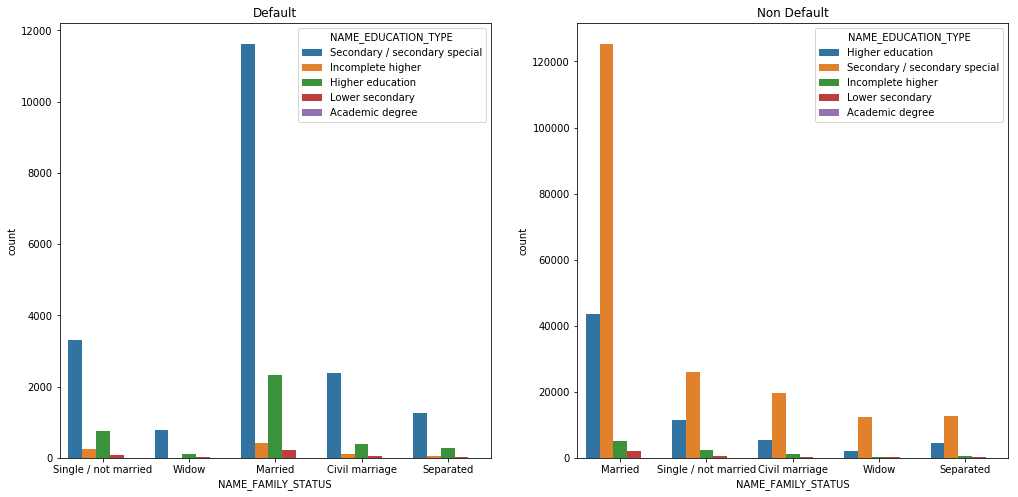

In [202]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (17, 8))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "NAME_FAMILY_STATUS", hue = 'NAME_EDUCATION_TYPE', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "NAME_FAMILY_STATUS", hue = 'NAME_EDUCATION_TYPE', data = df_0)
plt.show()

**CONCLUSION** - An unmarried customer with higher education is less likely to default.

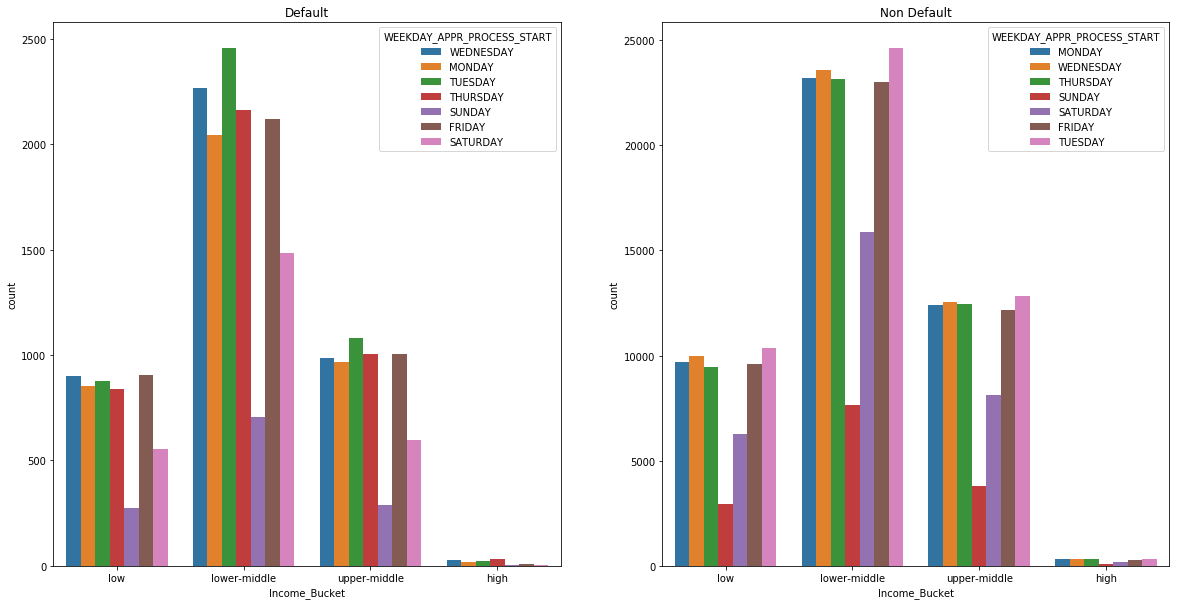

In [203]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "Income_Bucket", hue = 'WEEKDAY_APPR_PROCESS_START', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "Income_Bucket", hue = 'WEEKDAY_APPR_PROCESS_START', data = df_0)
plt.show()

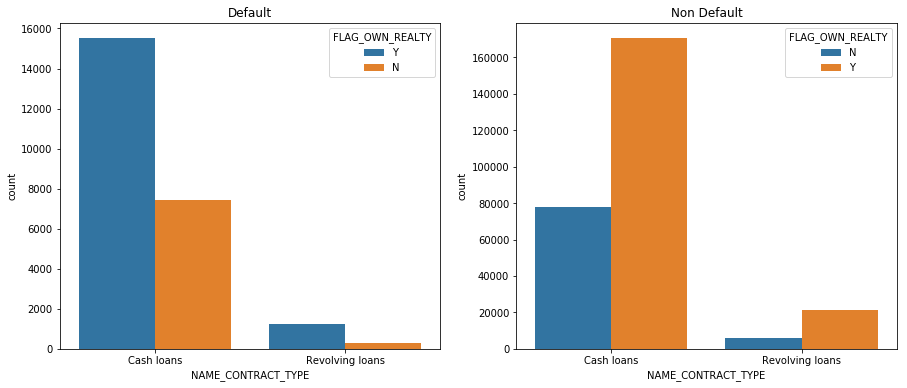

In [204]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = 'FLAG_OWN_REALTY', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = 'FLAG_OWN_REALTY', data = df_0)
plt.show()

# **EXPLORING PREVIOUS APP DATASET**

## **PART-1 CLEANING AND ANALYSIS OF DATA**

## **Taking 40% Sample of the data for previous data**

In [205]:
import random
num_lines=sum(1 for i in open("./data/previous_application.csv"))
num_lines

1670215

In [206]:
size=round(num_lines*0.6)
size

1002129

In [207]:
ids=random.sample(range(1,num_lines),size)
len(ids)

1002129

In [208]:
df_prev=pd.read_csv("./data/previous_application.csv",skiprows=ids)
df_prev.shape

(668085, 37)

In [209]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
1,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
2,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
3,2330894,258628,Cash loans,12165.210,148500.0,174361.5,NaN,148500.0,TUESDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,-860,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,high,Cash X-Sell: high,365243.0,-830.0,-140.0,-200.0,-197.0,1.0
4,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,0.0,26550.0,SATURDAY,10,Y,1,0.0,NaN,NaN,XAP,Approved,-726,Cash through the bank,XAP,NaN,New,Construction Materials,POS,XNA,Stone,83,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0


In [210]:
x = 100*df_prev.isnull().sum().sort_values()/df_prev.shape[0]

In [211]:
x

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
AMT_APPLICATION                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
AMT_CREDIT                      0.000150
PRODUCT_COMBINATION             0.020955
CNT_PAYMENT                    22.287433
AMT_ANNUITY     

In [212]:
### DROPPING columns which have null values more than 40%
columns_incl = x[x<40].index
columns_incl

Index(['SK_ID_PREV', 'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY',
       'SELLERPLACE_AREA', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE',
       'NAME_PORTFOLIO', 'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE',
       'CODE_REJECT_REASON', 'DAYS_DECISION', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'AMT_APPLICATION',
       'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT',
       'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CONTRACT_TYPE', 'SK_ID_CURR', 'AMT_CREDIT', 'PRODUCT_COMBINATION',
       'CNT_PAYMENT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'],
      dtype='object')

In [213]:
df_prev1=df_prev.loc[:,columns_incl]
df_prev1.shape

(668085, 26)

### **MERGING THE 2 DATASETS**

In [214]:
df_prev1.SK_ID_CURR.value_counts().head()

265681    39
173680    37
156367    33
446486    31
187868    30
Name: SK_ID_CURR, dtype: int64

In [215]:
df_prev1.SK_ID_CURR = df_prev1.SK_ID_CURR.astype(str)

In [216]:
df_merge2=pd.merge(df_prev1,df,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')
df_merge2.shape

(554451, 69)

In [217]:
100*df_merge2.isnull().sum()/df_merge2.shape[0]

SK_ID_PREV                       0.000000
NAME_YIELD_GROUP                 0.000000
NAME_SELLER_INDUSTRY             0.000000
SELLERPLACE_AREA                 0.000000
CHANNEL_TYPE                     0.000000
NAME_PRODUCT_TYPE                0.000000
NAME_PORTFOLIO                   0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_CLIENT_TYPE                 0.000000
CODE_REJECT_REASON               0.000000
DAYS_DECISION                    0.000000
NAME_CONTRACT_STATUS             0.000000
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_PAYMENT_TYPE                0.000000
AMT_APPLICATION                  0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
HOUR_APPR_PROCESS_START_x        0.000000
WEEKDAY_APPR_PROCESS_START_x     0.000000
NAME_CONTRACT_TYPE_x             0.000000
SK_ID_CURR                       0.000000
AMT_CREDIT_x                     0.000180
PRODUCT_COMBINATION              0.022906
CNT_PAYMENT                     21

## dropping all rows with missing values (except EXT_rating)

In [218]:
df_merge2 = df_merge2[~df_merge2["Num-Children"].isnull()]                   

In [219]:
df_merge2 = df_merge2[~df_merge2["Size_Family"].isnull()] 

In [220]:
df_merge2 = df_merge2[~df_merge2["AMT_CREDIT_x"].isnull()] 

In [221]:
df_merge2 = df_merge2[~df_merge2["PRODUCT_COMBINATION"].isnull()] 

In [222]:
df_merge2 = df_merge2[~df_merge2["CNT_PAYMENT"].isnull()] 
df_merge2.shape

(433733, 69)

In [223]:

df_merge2 = df_merge2[~df_merge2["AMT_ANNUITY_x"].isnull()] 
df_merge2.shape

(433731, 69)

In [224]:
df_merge2 = df_merge2[~df_merge2["AMT_GOODS_PRICE_x"].isnull()] 
df_merge2.shape

(416129, 69)

In [225]:
100*df_merge2.isnull().sum()/df_merge2.shape[0]

SK_ID_PREV                       0.000000
NAME_YIELD_GROUP                 0.000000
NAME_SELLER_INDUSTRY             0.000000
SELLERPLACE_AREA                 0.000000
CHANNEL_TYPE                     0.000000
NAME_PRODUCT_TYPE                0.000000
NAME_PORTFOLIO                   0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_CLIENT_TYPE                 0.000000
CODE_REJECT_REASON               0.000000
DAYS_DECISION                    0.000000
NAME_CONTRACT_STATUS             0.000000
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_PAYMENT_TYPE                0.000000
AMT_APPLICATION                  0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
HOUR_APPR_PROCESS_START_x        0.000000
WEEKDAY_APPR_PROCESS_START_x     0.000000
NAME_CONTRACT_TYPE_x             0.000000
SK_ID_CURR                       0.000000
AMT_CREDIT_x                     0.000000
PRODUCT_COMBINATION              0.000000
CNT_PAYMENT                      0

#### CONVERTING AGE TO YEARS FOR DAYS_DECISION

In [226]:
df_merge2['DAYS_DECISION'] = abs(df_merge2['DAYS_DECISION'])/365
df_merge2['DAYS_DECISION'].describe()

count    416129.000000
mean          2.787626
std           2.155694
min           0.002740
25%           1.035616
50%           2.087671
75%           4.197260
max           8.005479
Name: DAYS_DECISION, dtype: float64

In [227]:
## dropping the outliers for easier analyis
def calc_iqr(x):
    Q1 = df_merge2[x].quantile(0.25)
    Q3 = df_merge2[x].quantile(0.75)
    IQR = Q3 - Q1
    return Q3+1.5*IQR
len(df_merge2.AMT_GOODS_PRICE_x[(df_merge2.AMT_GOODS_PRICE_x > 2*calc_iqr('AMT_GOODS_PRICE_x'))])


df_merge2=df_merge2[df_merge2.AMT_GOODS_PRICE_x<2*calc_iqr('AMT_GOODS_PRICE_x')]

In [228]:
df_merge2.shape

(399273, 69)

## **PART 2.CORRELATION AND TOP 10 VARIABLES**

**Grouping similar variable together**

In [229]:
df_merge2.columns.values

array(['SK_ID_PREV', 'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY',
       'SELLERPLACE_AREA', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE',
       'NAME_PORTFOLIO', 'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE',
       'CODE_REJECT_REASON', 'DAYS_DECISION', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'AMT_APPLICATION',
       'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT',
       'HOUR_APPR_PROCESS_START_x', 'WEEKDAY_APPR_PROCESS_START_x',
       'NAME_CONTRACT_TYPE_x', 'SK_ID_CURR', 'AMT_CREDIT_x',
       'PRODUCT_COMBINATION', 'CNT_PAYMENT', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE_y', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_y',
       'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'FLAG_OWN_REALTY',
       'NAME

In [230]:
df_merge2 = df_merge2[['SK_ID_PREV','SK_ID_CURR',
        'NAME_CONTRACT_STATUS','TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','CODE_REJECT_REASON', 'DAYS_DECISION', 
        'AMT_INCOME_TOTAL',  'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','AMT_APPLICATION','AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y',
       'NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'NAME_YIELD_GROUP',
         'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE',               
        'NAME_SELLER_INDUSTRY','SELLERPLACE_AREA', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE',
       'NAME_PORTFOLIO', 'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE',      
       'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT',
       'HOUR_APPR_PROCESS_START_x', 'WEEKDAY_APPR_PROCESS_START_x',
       'PRODUCT_COMBINATION', 'CNT_PAYMENT', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS',
       'CNT_CHILDREN', 'FLAG_OWN_REALTY',
       'NAME_HOUSING_TYPE', 'FLAG_OWN_CAR', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y',
       'NAME_TYPE_SUITE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YRS_EMPLOYED',
       'Hourly_Bucket', 'Age_Bucket', 'Income_Bucket', 'Num-Children',
       'Size_Family']]

In [231]:
df_merge3 = df_merge2.loc[:,['NAME_CONTRACT_STATUS','TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','DAYS_DECISION','CNT_FAM_MEMBERS',
       'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y','NAME_SELLER_INDUSTRY','CHANNEL_TYPE',
          'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP', 'FLAG_OWN_CAR','NAME_PORTFOLIO',  'AGE', 'YRS_EMPLOYED',
        'AMT_INCOME_TOTAL',  'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','AMT_APPLICATION','AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y']]

In [232]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399273 entries, 0 to 554450
Data columns (total 37 columns):
NAME_CONTRACT_STATUS          399273 non-null object
TARGET                        399273 non-null object
EXT_SOURCE_1                  173848 non-null float64
EXT_SOURCE_2                  398658 non-null float64
EXT_SOURCE_3                  329520 non-null float64
DAYS_DECISION                 399273 non-null float64
CNT_FAM_MEMBERS               399273 non-null float64
CNT_CHILDREN                  399273 non-null int64
REGION_POPULATION_RELATIVE    399273 non-null float64
OBS_30_CNT_SOCIAL_CIRCLE      399273 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE      399273 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE      399273 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE      399273 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    399273 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     399273 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    399273 non-null float64
AMT_REQ_CREDIT_BUREAU_MON    

#### **SPLITTING THE DATASETS INTO 3 PARTS ON THE BASIS OF CONTRACT_STATUS**

In [233]:
df_appr=df_merge3[df_merge3.NAME_CONTRACT_STATUS=='Approved']
df_canc=df_merge3[df_merge3.NAME_CONTRACT_STATUS=='Canceled']
df_refu=df_merge3[df_merge3.NAME_CONTRACT_STATUS=='Refused']

In [234]:
corr = df_appr.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.iloc[0:10]

,VAR1,VAR2,Correlation_Value,Corr_abs
615,AMT_APPLICATION,AMT_GOODS_PRICE_x,1.000000,1.000000
250,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998533,0.998533
643,AMT_CREDIT_x,AMT_APPLICATION,0.990483,0.990483
642,AMT_CREDIT_x,AMT_GOODS_PRICE_x,0.990483,0.990483
726,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.984516,0.984516
139,CNT_CHILDREN,CNT_FAM_MEMBERS,0.882125,0.882125
278,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.866624,0.866624
587,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,0.818696,0.818696
614,AMT_APPLICATION,AMT_ANNUITY_x,0.818696,0.818696
641,AMT_CREDIT_x,AMT_ANNUITY_x,0.807333,0.807333


In [235]:
corr = df_refu.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.iloc[0:10]

,VAR1,VAR2,Correlation_Value,Corr_abs
615,AMT_APPLICATION,AMT_GOODS_PRICE_x,0.998757,0.998757
250,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998447,0.998447
726,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.982373,0.982373
642,AMT_CREDIT_x,AMT_GOODS_PRICE_x,0.980315,0.980315
643,AMT_CREDIT_x,AMT_APPLICATION,0.979631,0.979631
139,CNT_CHILDREN,CNT_FAM_MEMBERS,0.873463,0.873463
278,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.860477,0.860477
587,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,0.760064,0.760064
614,AMT_APPLICATION,AMT_ANNUITY_x,0.759326,0.759326
641,AMT_CREDIT_x,AMT_ANNUITY_x,0.753104,0.753104


## **PART 3.UNIVARIATE AND BIVARIATE ANALYSIS ON MERGED DATA**

### **1.UNIVARIATE-CONTINUOUS**

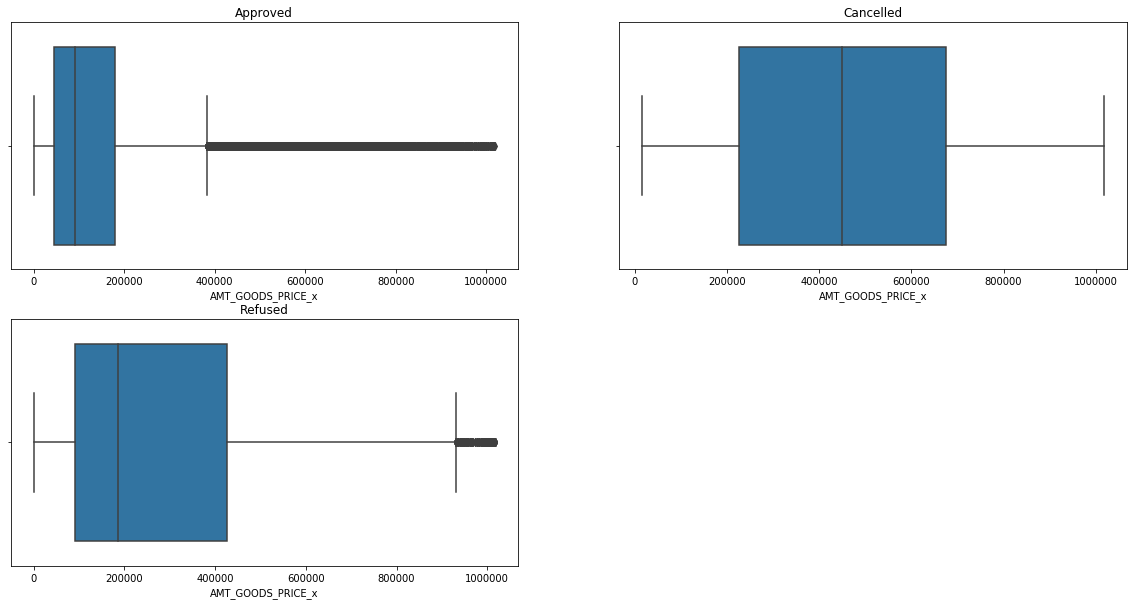

In [236]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(df_appr.AMT_GOODS_PRICE_x)
plt.subplot(2,2,2)
plt.title("Cancelled")
sns.boxplot(df_canc.AMT_GOODS_PRICE_x)
plt.subplot(2,2,3)
plt.title("Refused")
sns.boxplot(df_refu.AMT_GOODS_PRICE_x)
plt.show()

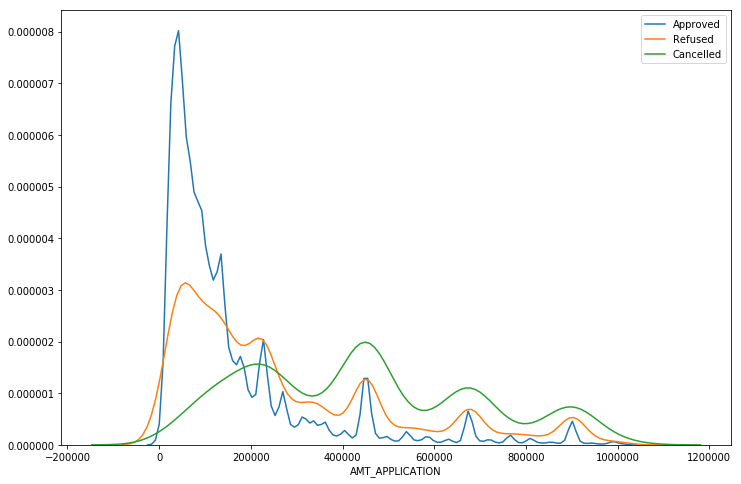

In [237]:
plt.figure(figsize=[12,8])
sns.distplot(df_appr.AMT_APPLICATION, hist = False, label = 'Approved')
sns.distplot(df_refu.AMT_APPLICATION, hist = False, label = 'Refused')
sns.distplot(df_canc.AMT_APPLICATION, hist = False, label = 'Cancelled')
plt.show()

**CONCLUSION** - The above 2 graphs suggest strongly that the probablity of approving a loan is higher if the Loan amount applied for is below 200000.

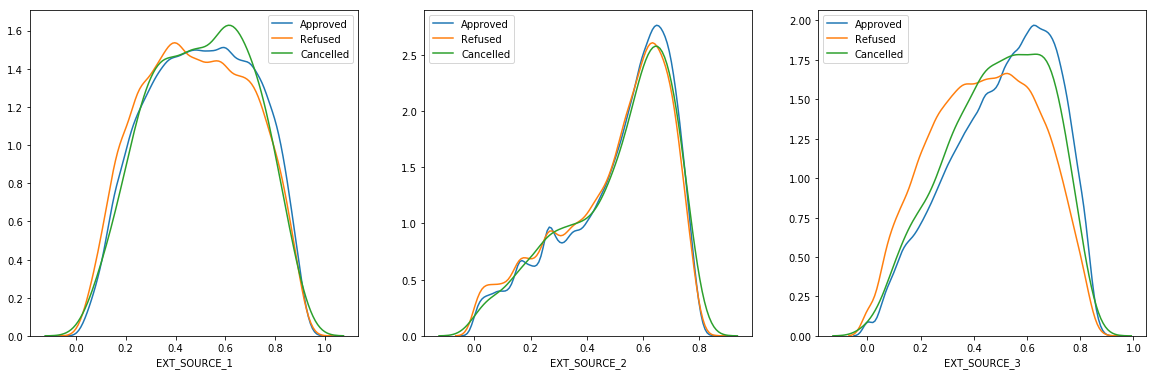

In [238]:
plt.figure(figsize=[20,6])
plt.subplot(1,3,1)
sns.distplot(df_appr.EXT_SOURCE_1, hist = False, label = 'Approved')
sns.distplot(df_refu.EXT_SOURCE_1, hist = False, label = 'Refused')
sns.distplot(df_canc.EXT_SOURCE_1, hist = False, label = 'Cancelled')
plt.subplot(1,3,2)
sns.distplot(df_appr.EXT_SOURCE_2, hist = False, label = 'Approved')
sns.distplot(df_refu.EXT_SOURCE_2, hist = False, label = 'Refused')
sns.distplot(df_canc.EXT_SOURCE_2, hist = False, label = 'Cancelled')
plt.subplot(1,3,3)
sns.distplot(df_appr.EXT_SOURCE_3, hist = False, label = 'Approved')
sns.distplot(df_refu.EXT_SOURCE_3, hist = False, label = 'Refused')
sns.distplot(df_canc.EXT_SOURCE_3, hist = False, label = 'Cancelled')

plt.show()

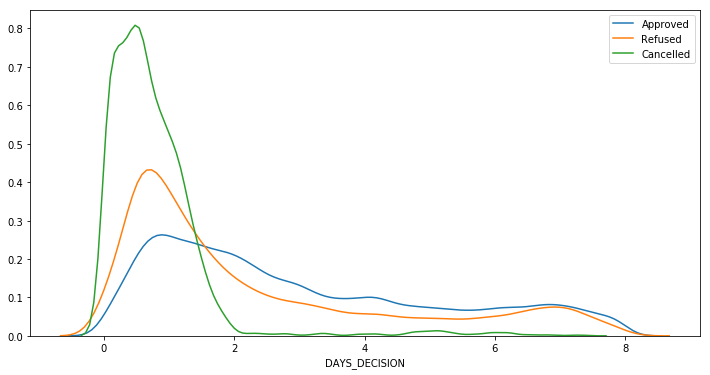

In [239]:

plt.figure(figsize=[12,6])
sns.distplot(df_appr.DAYS_DECISION, hist = False, label = 'Approved')
sns.distplot(df_refu.DAYS_DECISION, hist = False, label = 'Refused')
sns.distplot(df_canc.DAYS_DECISION, hist = False, label = 'Cancelled')
plt.show()

**CONCLUSION** - It doesn't take a long time to cancel a loan request, but this bank take usually more than 2 days to approve a loan, there is also a risk of the customer cancelling the request in that period.

### **2.UNIVAR-CATEGORICAL**

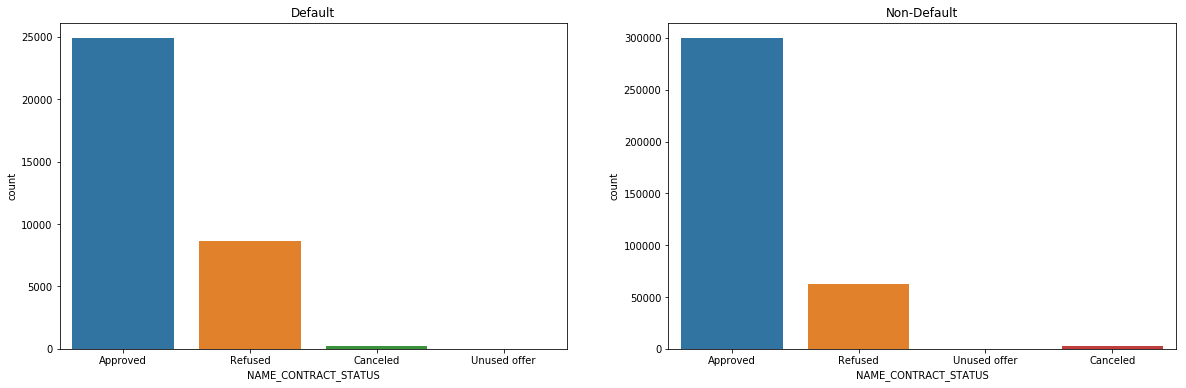

In [240]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)

x=df_merge3[df_merge3.TARGET=='Yes']
plt.title("Default")
sns.countplot(x['NAME_CONTRACT_STATUS'])

plt.subplot(1,2,2)
y=df_merge3[df_merge3.TARGET=='No']
plt.title("Non-Default")
sns.countplot(y['NAME_CONTRACT_STATUS'])

plt.show()

**CONCLUSION** - 

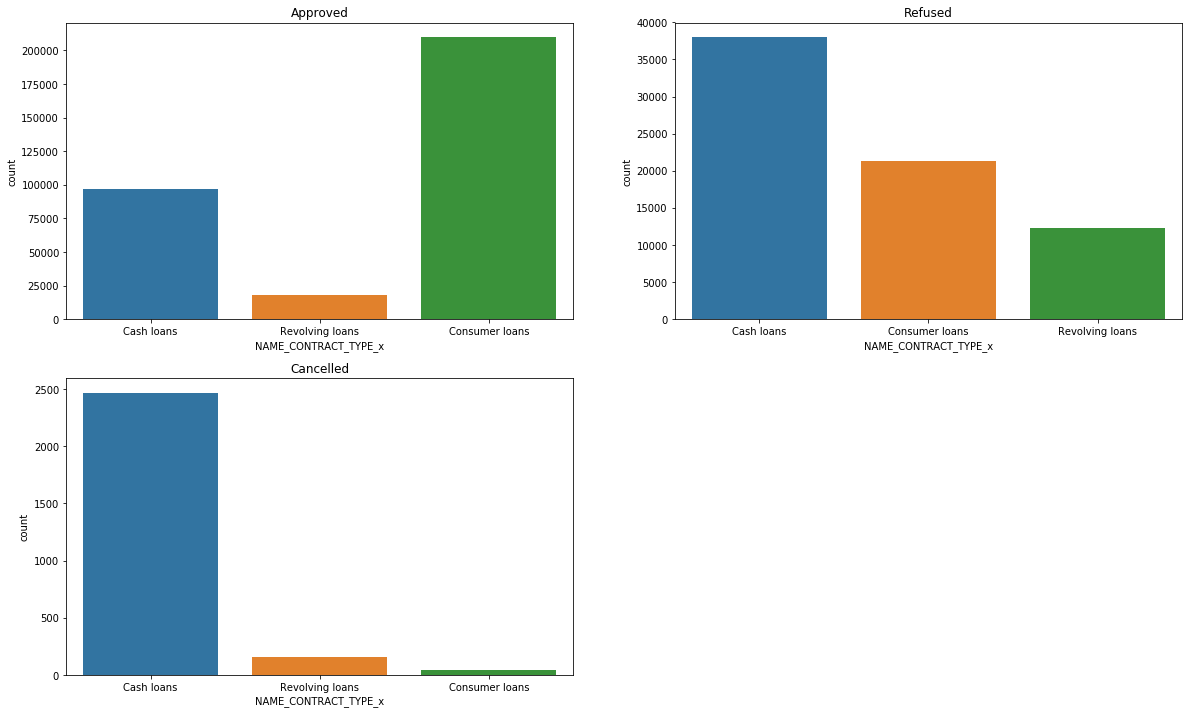

In [241]:
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(df_appr['NAME_CONTRACT_TYPE_x'])


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(df_refu['NAME_CONTRACT_TYPE_x'])

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(df_canc['NAME_CONTRACT_TYPE_x'])
plt.show()

**CONCLUSION** - From the above metric we can see that mostly **Consumer Loans are approved** and **Cash Loans are rejected** .

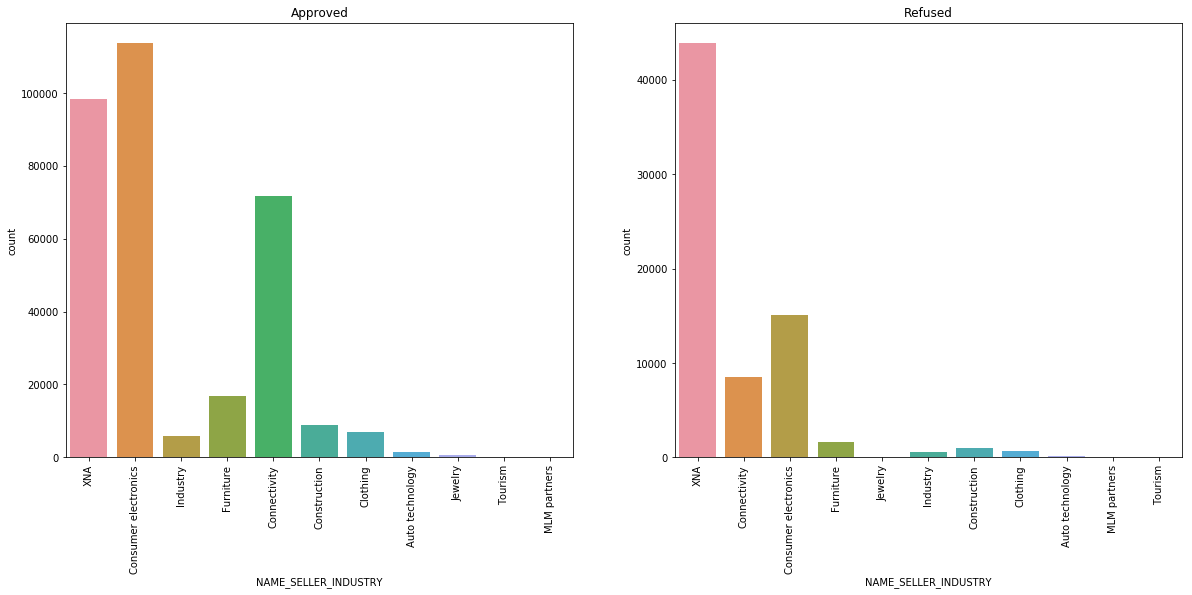

In [242]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
plt.title("Approved")
plt.xticks(rotation=90)
sns.countplot(df_appr['NAME_SELLER_INDUSTRY'])


plt.subplot(1,2,2)
plt.title("Refused")
plt.xticks(rotation=90)
sns.countplot(df_refu['NAME_SELLER_INDUSTRY'])
plt.show()

**CONCLUSION** -Most of the loans approved belongs to the data where Selling industry is **Consumer Electronics**.

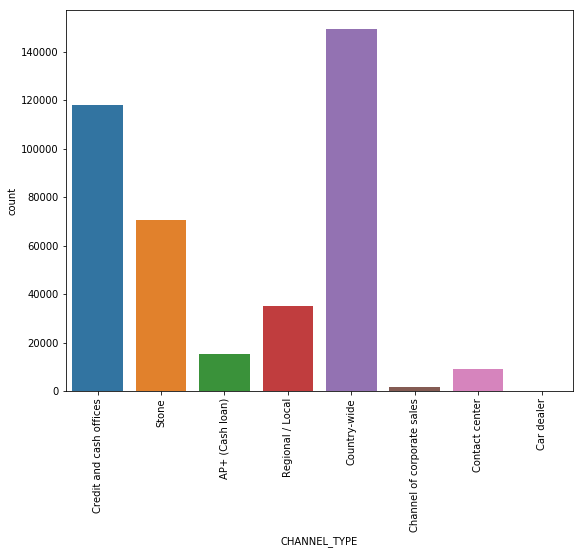

In [243]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(df_merge3['CHANNEL_TYPE'])

**CONCLUSION** -Top channels through which they acquired the client on the previous application :
- Credit and cash offices : 43 % times
- Country_wide : 30 % times
- Stone : 13 % times


### **3.BIVARIATE-CONTI-CONTI**

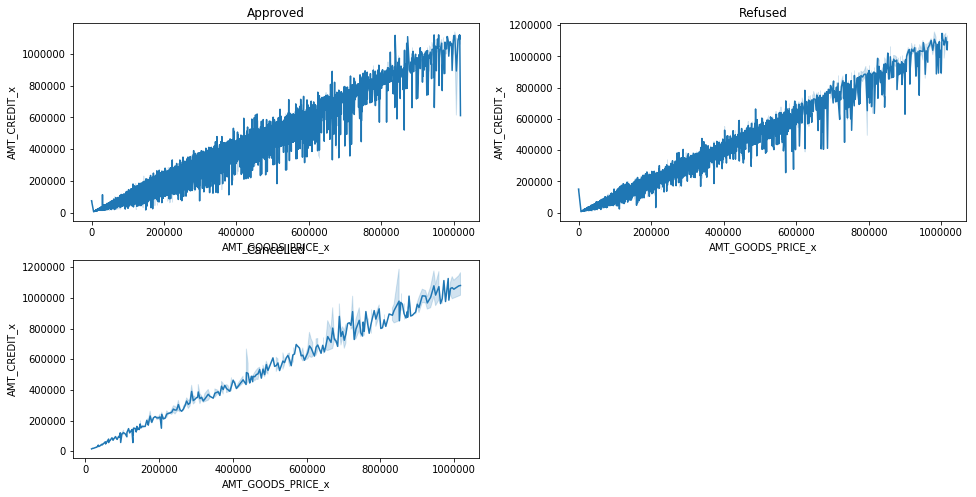

In [244]:
# Scatter

plt.figure(figsize = (16, 8))
plt.subplot(2,2,1)
plt.title("Approved")
sns.lineplot(x='AMT_GOODS_PRICE_x',y='AMT_CREDIT_x',data=df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.lineplot(df_refu['AMT_GOODS_PRICE_x'], df_refu['AMT_CREDIT_x'])

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.lineplot(df_canc['AMT_GOODS_PRICE_x'], df_canc['AMT_CREDIT_x'])
plt.show()

### **3.BIVARIATE-CONTI-CATEGORICAL**


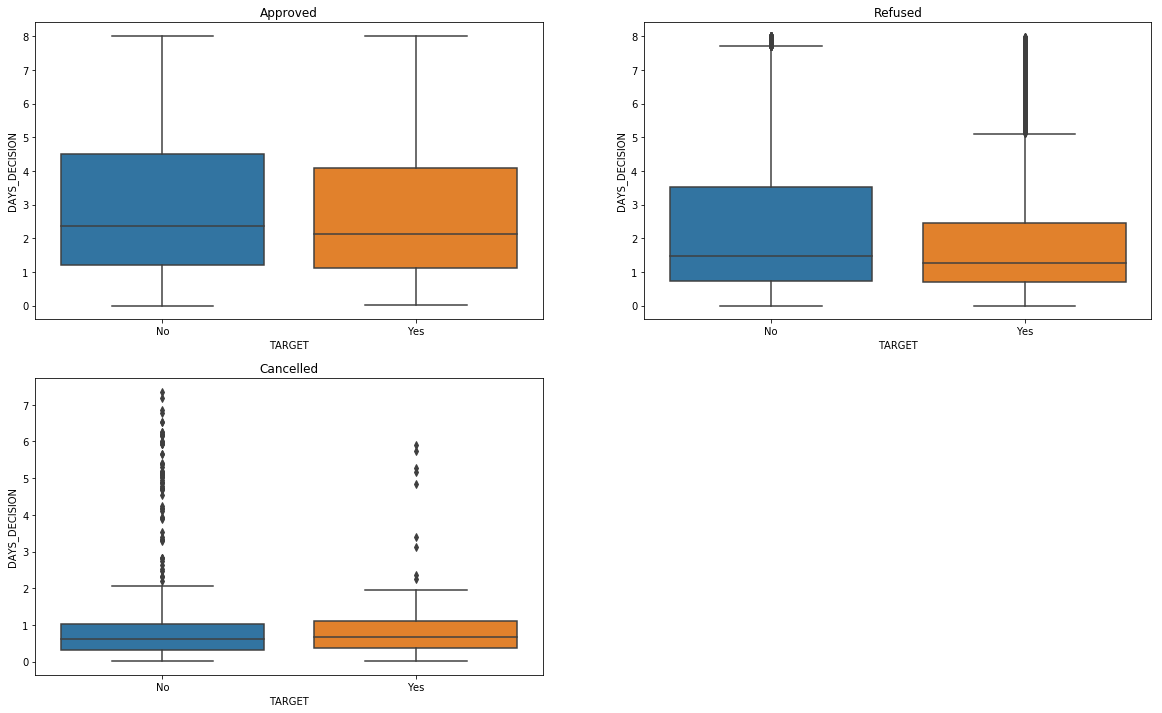

In [245]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_canc)
plt.show()

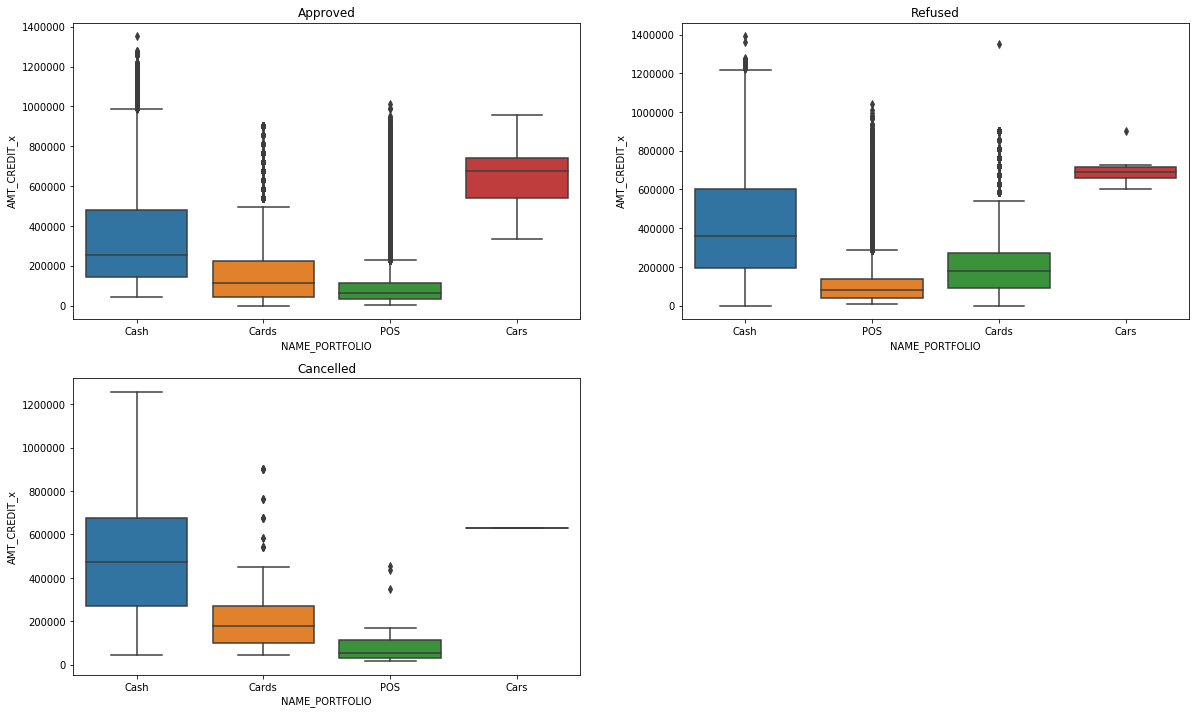

In [246]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT_x', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT_x', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT_x', data = df_canc)
plt.show()

**CONCLUSION** - The maximum amount of credit loans were taken for the NAME_PORTFOLIO as "CASH"

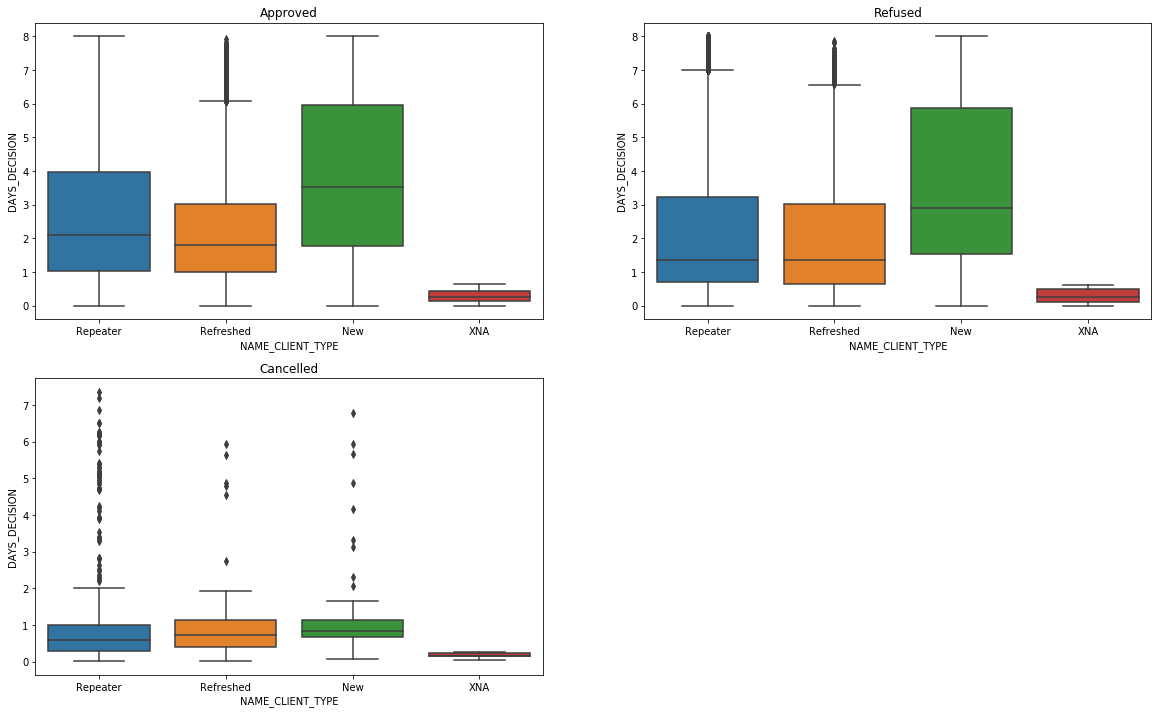

In [247]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'DAYS_DECISION', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'DAYS_DECISION', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'DAYS_DECISION', data = df_canc)
plt.show()

**CONCLUSION** - New CLients have a higher number of decision days in comparison to the older clients ie for newer clients the the relative time taken for a decision on previous application is much higher than the older clients as they may be involved in paperworks and other parameters which may impact their loan approval.

### **5.BIVARIATE-CATEGORICAL-CATEGORICAL**


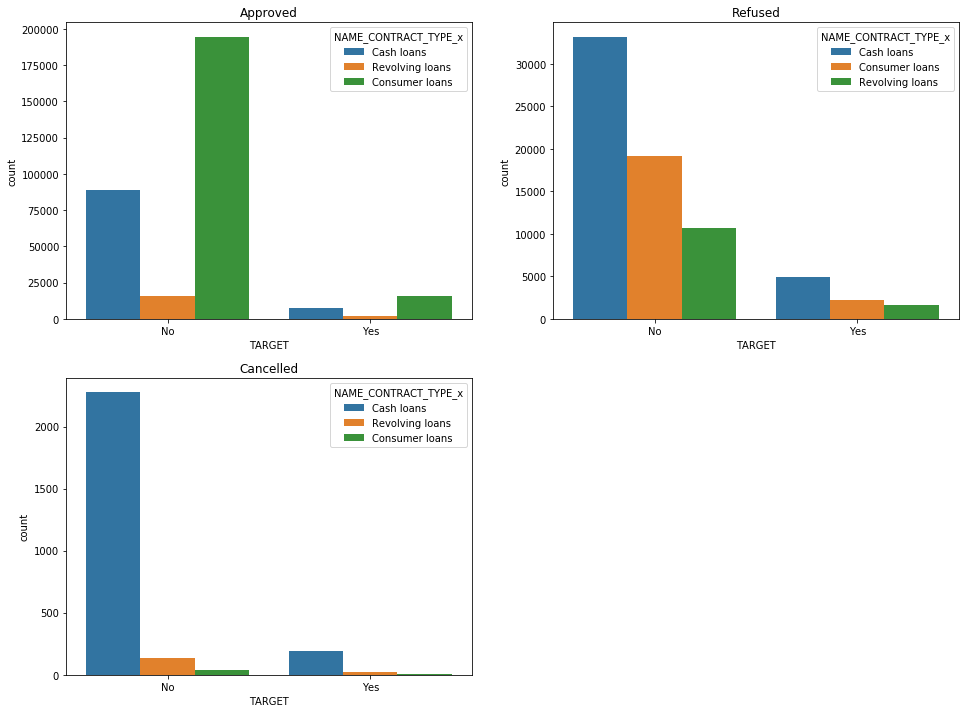

In [248]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (16, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(x = "TARGET", hue = 'NAME_CONTRACT_TYPE_x', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(x = "TARGET", hue = 'NAME_CONTRACT_TYPE_x', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(x = "TARGET", hue = 'NAME_CONTRACT_TYPE_x', data = df_canc)
plt.show()

**CONCLUSION** - 
- From the above analysis we can see that people who have approved previous loans and belong to the category of consumer loans tend to default the maximum.
- People who have been refused previous loans and have taken cash loans tends to belong to non-default category. A possible reason may be they have been rejected a loan multiple times and hence once they get the loan they will not be willing to take a risk to come under defaulter category and hence get rejected again in future.

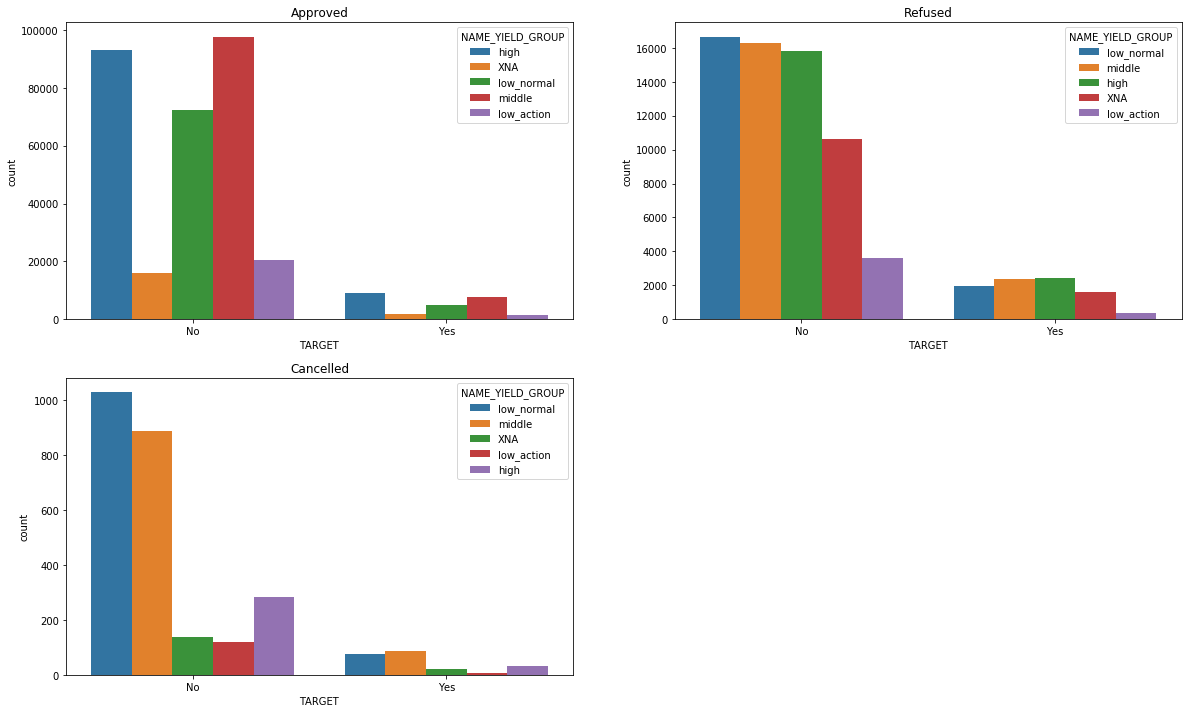

In [249]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(x = "TARGET", hue = 'NAME_YIELD_GROUP', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(x = "TARGET", hue = 'NAME_YIELD_GROUP', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(x = "TARGET", hue = 'NAME_YIELD_GROUP', data = df_canc)
plt.show()

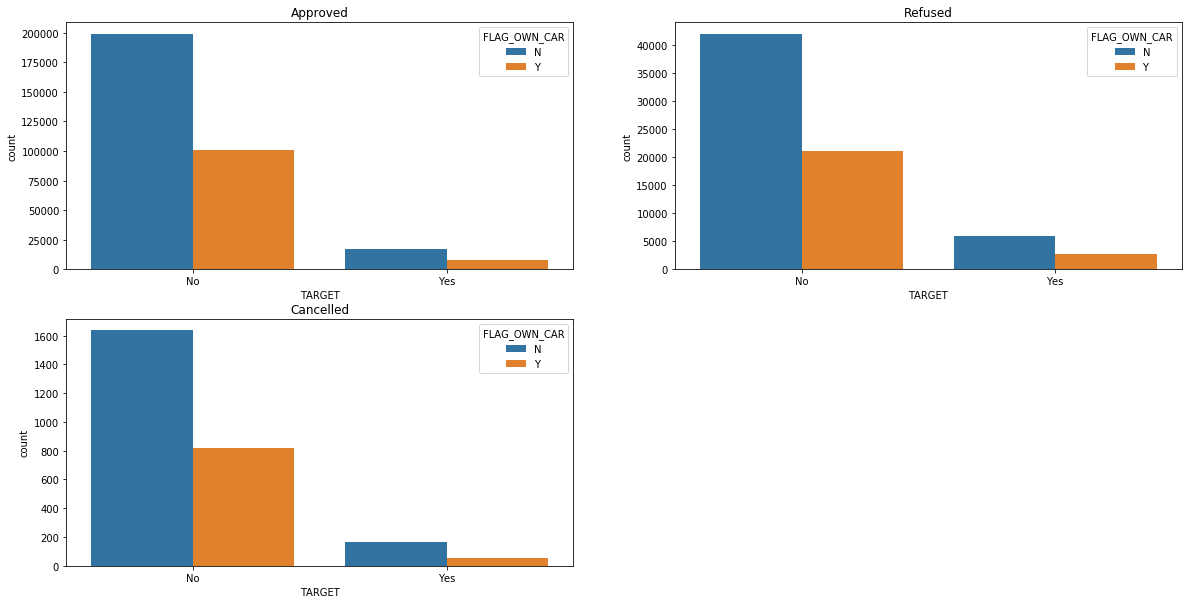

In [250]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(x = "TARGET", hue = 'FLAG_OWN_CAR', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(x = "TARGET", hue = 'FLAG_OWN_CAR', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(x = "TARGET", hue = 'FLAG_OWN_CAR', data = df_canc)
plt.show()

# **FINAL_CONCLUSION**

### **DRIVING VARIABLES FOR TARGET**

- NAME_CONTRACT_TYPE_x
- EXT_SOURCE_1
- EXT_SOURCE_2
- Age_Bucket
- NAME_INCOME_TYPE
- OCCUPATION_TYPE
- REGION_POPULATION_RELATIVE vs AMT_INCOME_TOTAL
- NAME_CONTRACT_STATUS

### **DRIVING VARIABLES FOR NAME_CONTRACT_STATUS**

- AMT_APPLICATION,
- NAME_CONTRACT_TYPE_x
- NAME_SELLER_INDUSTRY
- NAME_CLIENT_TYPE VS DAYS_DECISION